In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

In [3]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
#sibsp # of siblions and spouses
#fare price of fare
#parch number of father or children
#cabin cabin number
#embarked port of embarked C = cehnbourge 1 = queenstown s= southhampton
train.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [7]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

<AxesSubplot:>

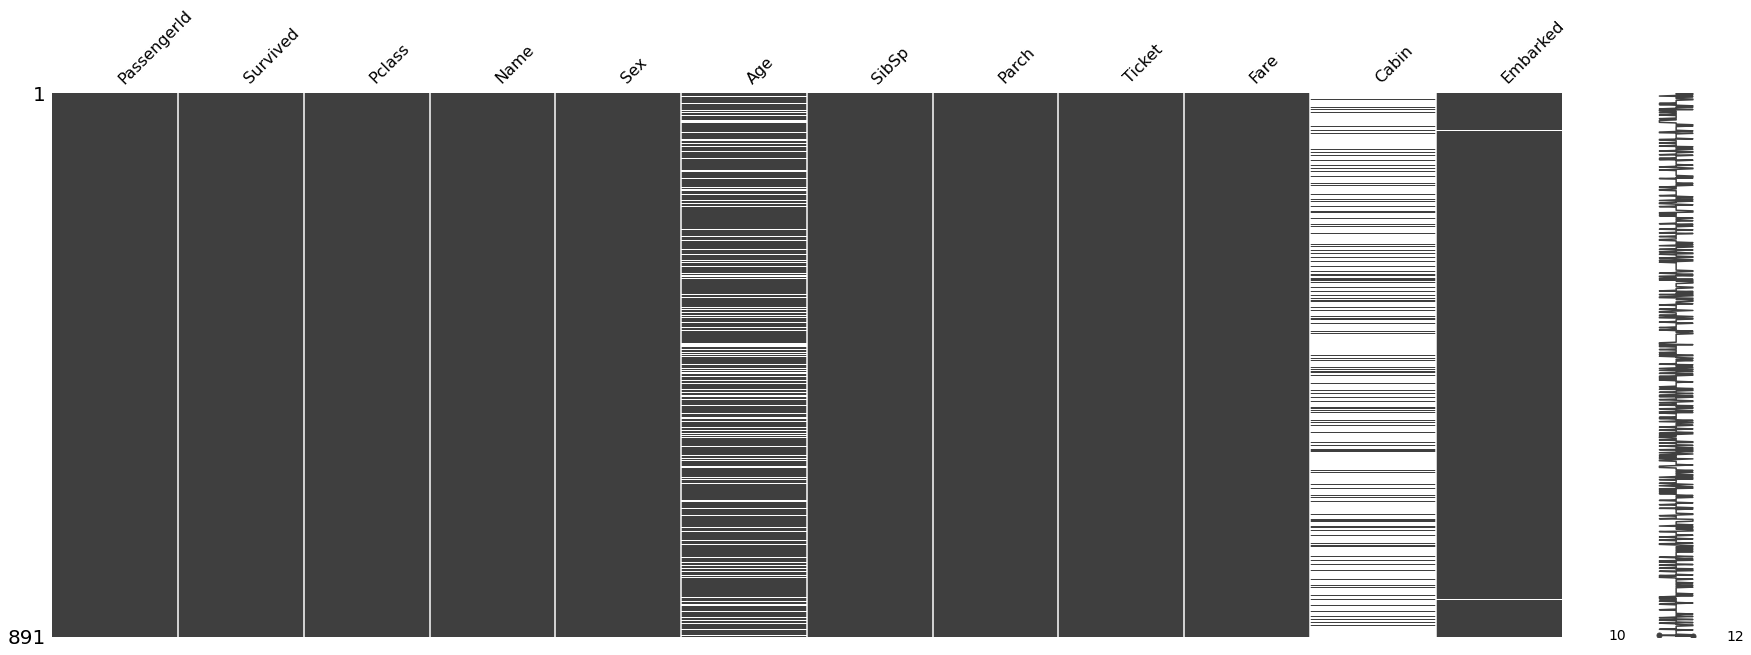

In [8]:
msno.matrix(train, figsize = (30,10))

In [9]:
def find_missing_value(df, columns):
    missing = {}
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing[column] = df_length-total_column_values
    return missing
missing_values = find_missing_value(train, columns=train.columns)

In [10]:
missing_values

{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

In [11]:
df_bin = pd.DataFrame()
#chopped into bins
df_con = pd.DataFrame()

In [12]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
fig = plt.figure(figsize=(20,1))



<Figure size 1440x72 with 0 Axes>

<AxesSubplot:xlabel='count', ylabel='Survived'>

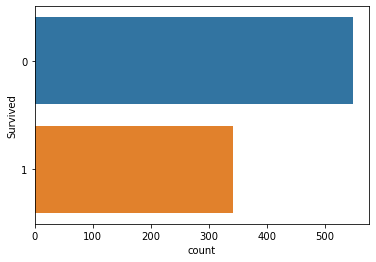

In [14]:
sns.countplot(y='Survived',data=train)

In [15]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
df_bin['Survived'] = train['Survived']
#chopped into bins
df_con['Survived'] = train['Survived']

In [17]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [18]:

pd.pivot_table(train, index= ['Sex'], values = 'Survived',aggfunc=np.sum)

Survived
Sex             
female       233
male         109

In [19]:
pd.pivot_table(train, index= ['Pclass'], values = 'Survived', aggfunc=np.sum)

Survived
Pclass          
1            136
2             87
3            119

In [20]:
pd.pivot_table(train, index= ['Pclass'], values = 'Survived')

Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363

C:\Users\mat_c\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pclass', ylabel='Density'>

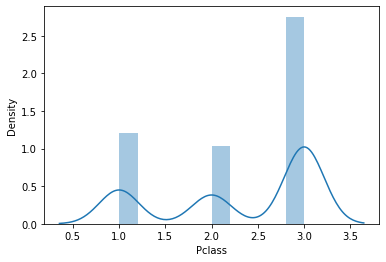

In [21]:
sns.distplot(train.Pclass)

In [22]:
df_bin['Pclass'] = train['Pclass']
#chopped into bins
df_con['Pclass'] = train['Pclass']

In [23]:
train.Pclass

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [24]:
train['title'] = train['Name'].apply(lambda x: 1 if 'Mr.' in x else 2 if 'Mrs.' in x else 0 )

In [25]:
train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [26]:
train.title

0      1
1      2
2      0
3      2
4      1
      ..
886    0
887    0
888    0
889    1
890    1
Name: title, Length: 891, dtype: int64

In [27]:
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0)
#chopped into bins
df_con['Sex'] = train['Sex']

In [28]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  title  
0      0         A/5 21171   7.2500   NaN        S      1  
1      0          PC 17599  71.2833   C85        C      2  
2      0  STON/O2. 3101282   7.9250   NaN        S      0  
3      0            113803  53.1000  C123        S      2  
4      0            373450   8.0500   NaN        S      1

C:\Users\mat_c\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mat_c\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


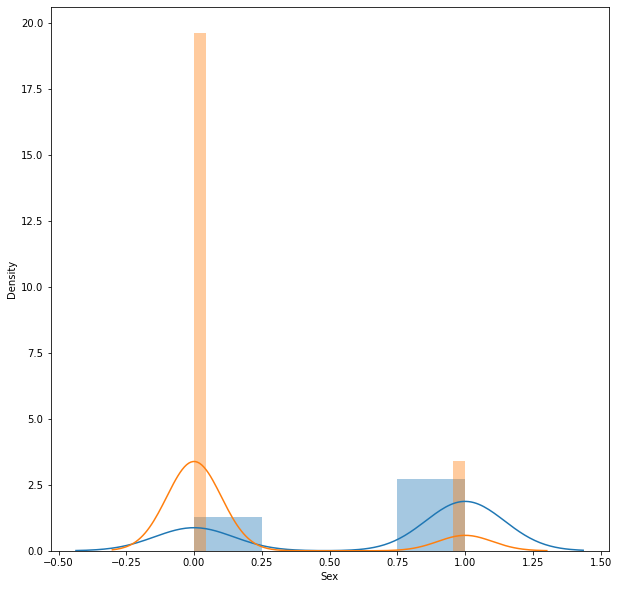

In [29]:
fig = plt.figure(figsize = (10,10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws ={'label' :'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws ={'label' :'Did not Survive'});

In [30]:
train.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [31]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [32]:
data_age_with_null = train[['PassengerId', 'Pclass', 'Survived', 'SibSp', 'Parch', 'Fare', 'Age']]

In [33]:
data_age_with_null

PassengerId  Pclass  Survived  SibSp  Parch     Fare   Age
0              1       3         0      1      0   7.2500  22.0
1              2       1         1      1      0  71.2833  38.0
2              3       3         1      0      0   7.9250  26.0
3              4       1         1      1      0  53.1000  35.0
4              5       3         0      0      0   8.0500  35.0
..           ...     ...       ...    ...    ...      ...   ...
886          887       2         0      0      0  13.0000  27.0
887          888       1         1      0      0  30.0000  19.0
888          889       3         0      1      2  23.4500   NaN
889          890       1         1      0      0  30.0000  26.0
890          891       3         0      0      0   7.7500  32.0

[891 rows x 7 columns]

In [34]:
data_age_no_null = train[['PassengerId', 'Pclass', 'Survived', 'SibSp', 'Parch', 'Fare', 'Age']].dropna()

In [35]:
data_age_no_null

PassengerId  Pclass  Survived  SibSp  Parch     Fare   Age
0              1       3         0      1      0   7.2500  22.0
1              2       1         1      1      0  71.2833  38.0
2              3       3         1      0      0   7.9250  26.0
3              4       1         1      1      0  53.1000  35.0
4              5       3         0      0      0   8.0500  35.0
..           ...     ...       ...    ...    ...      ...   ...
885          886       3         0      0      5  29.1250  39.0
886          887       2         0      0      0  13.0000  27.0
887          888       1         1      0      0  30.0000  19.0
889          890       1         1      0      0  30.0000  26.0
890          891       3         0      0      0   7.7500  32.0

[714 rows x 7 columns]

In [36]:
train_age_x = data_age_no_null.iloc[:,:6]

In [37]:
train_age_x

PassengerId  Pclass  Survived  SibSp  Parch     Fare
0              1       3         0      1      0   7.2500
1              2       1         1      1      0  71.2833
2              3       3         1      0      0   7.9250
3              4       1         1      1      0  53.1000
4              5       3         0      0      0   8.0500
..           ...     ...       ...    ...    ...      ...
885          886       3         0      0      5  29.1250
886          887       2         0      0      0  13.0000
887          888       1         1      0      0  30.0000
889          890       1         1      0      0  30.0000
890          891       3         0      0      0   7.7500

[714 rows x 6 columns]

In [38]:
train_age_y = data_age_no_null.iloc[:,6]

In [39]:
train_age_y 

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [40]:
linreg.fit(train_age_x,train_age_y)

LinearRegression()

In [41]:
test_age = data_age_with_null.iloc[:,:6]

In [42]:
age_age = pd.DataFrame(data = linreg.predict(test_age), columns = ['Age'])

In [43]:
age_age

Age
0    24.980663
1    33.299445
2    22.172865
3    33.571320
4    28.956368
..         ...
886  37.216177
887  38.207360
888  23.457198
889  38.208051
890  29.266806

[891 rows x 1 columns]

In [44]:
train.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [45]:
train.Age.fillna(age_age.Age,inplace=True)

In [46]:
train.Age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    23.457198
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [47]:
missing_values['Age']

177

In [48]:
df_con['Age'] = train['Age']

In [49]:
df_bin['Age'] = pd.cut(train['Age'], 10)

In [50]:
df_bin.Age

0       (20.23, 28.768]
1      (37.307, 45.846]
2       (20.23, 28.768]
3      (28.768, 37.307]
4      (28.768, 37.307]
             ...       
886     (20.23, 28.768]
887     (11.691, 20.23]
888     (20.23, 28.768]
889     (20.23, 28.768]
890    (28.768, 37.307]
Name: Age, Length: 891, dtype: category
Categories (10, interval[float64]): [(-5.471, 3.153] < (3.153, 11.691] < (11.691, 20.23] < (20.23, 28.768] ... (45.846, 54.384] < (54.384, 62.923] < (62.923, 71.461] < (71.461, 80.0]]

In [51]:

def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

In [52]:
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

C:\Users\mat_c\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mat_c\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


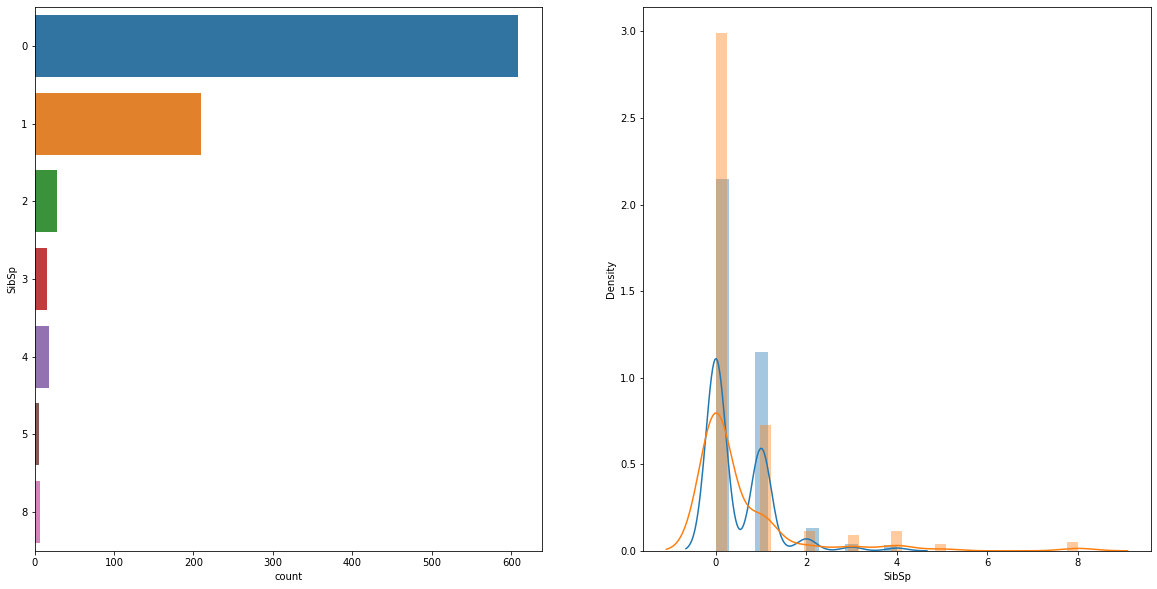

In [53]:
plot_count_dist(
    train, 
    bin_df=df_bin,
    label_column='Survived',
    target_column='SibSp',
    figsize=(20,10)
)

In [54]:
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

C:\Users\mat_c\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mat_c\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


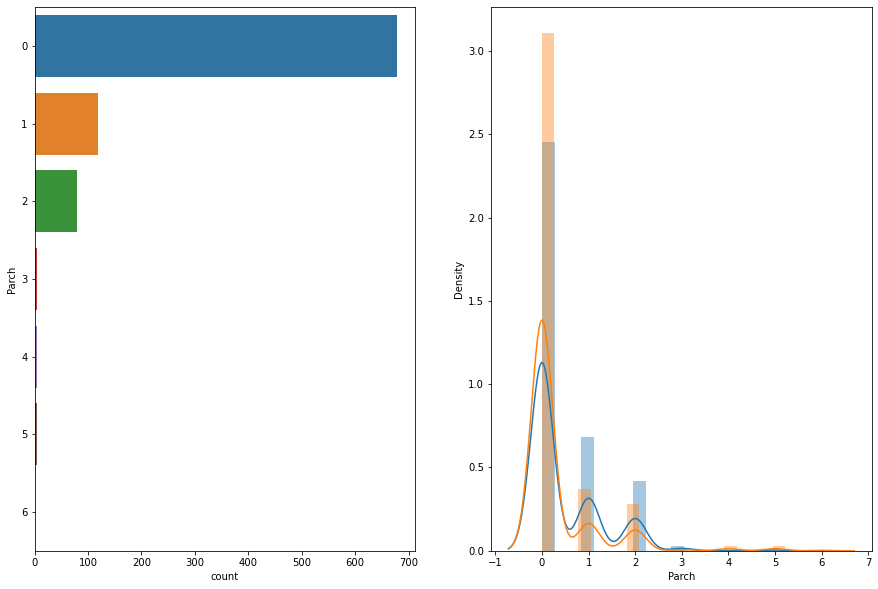

In [55]:
plot_count_dist(
    train, 
    bin_df=df_bin,
    label_column='Survived',
    target_column='Parch',
    figsize=(15,10)
)

In [56]:
df_con.head()

Survived  Pclass     Sex   Age  SibSp  Parch
0         0       3    male  22.0      1      0
1         1       1  female  38.0      1      0
2         1       3  female  26.0      0      0
3         1       1  female  35.0      1      0
4         0       3    male  35.0      0      0

<AxesSubplot:xlabel='count', ylabel='Ticket'>

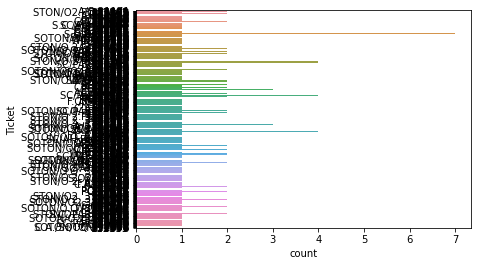

In [57]:
sns.countplot(y='Ticket', data=train)

In [58]:
train.Ticket.value_counts()

1601        7
CA. 2343    7
347082      7
347088      6
3101295     6
           ..
343095      1
29751       1
345364      1
349209      1
349228      1
Name: Ticket, Length: 681, dtype: int64

In [59]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  title  
0      0         A/5 21171   7.2500   NaN        S      1  
1      0          PC 17599  71.2833   C85        C      2  
2      0  STON/O2. 3101282   7.9250   NaN        S      0  
3      0            113803  53.1000  C123        S      2  
4      0            373450   8.0500   NaN        S      1

In [60]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  title  
0      0         A/5 21171   7.2500   NaN        S      1  
1      0          PC 17599  71.2833   C85        C      2  
2      0  STON/O2. 3101282   7.9250   NaN        S      0  
3      0            113803  53.1000  C123        S      2  
4      0            373450   8.0500   NaN        S      1

In [61]:
df_test = pd.DataFrame()

In [62]:
df_tests = train.sort_values(['Fare', 'Ticket'])


In [63]:
df_test.head()

Empty DataFrame
Columns: []
Index: []

In [64]:
df_test.columns

Index([], dtype='object')

In [65]:
df_tests.index

Int64Index([806, 633, 815, 263, 822, 277, 413, 466, 481, 732,
            ...
            299, 311, 742,  27,  88, 341, 438, 258, 679, 737],
           dtype='int64', length=891)

In [66]:
train.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [67]:
pd.pivot_table(train, index= ['Fare','Ticket','Pclass'], values = 'Survived')

Survived
Fare     Ticket   Pclass          
0.0000   112050   1           0.00
         112052   1           0.00
         112058   1           0.00
         112059   1           0.00
         19972    1           0.00
...                            ...
227.5250 PC 17757 1           0.75
247.5208 PC 17558 1           0.50
262.3750 PC 17608 1           1.00
263.0000 19950    1           0.50
512.3292 PC 17755 1           1.00

[682 rows x 1 columns]

In [68]:
druf = pd.pivot_table(train, index= ['Fare','Ticket','Pclass'], values = 'Survived')
Fare_list = pd.unique(train['Fare'])

In [69]:
Fare_list = np.sort(Fare_list)

In [70]:

pd.set_option('display.max_rows', 900)

In [71]:
tester = train

In [72]:
tester

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
30            31         0       1   
31            32         1       1   
32            33         1       3   
33            34         0       2   
34            35         0       1   
35            36         0       1   
36            37         1       3   
37            38         0       3   
38            39         0       3   
39            40         1       3   
40            41         0       3   
41            42         0       2   
42            43         0       3   
43            44         1       2   
44            45         1       3   
45            46         0       3   
46            47         0       3   
47            48         1       3   
48            49         0       3   
49            50         0       3   
50            51         0       3   
51            52         0       3   
52            53         1       1   
53            54         1       2   
54            55         0       1   
55            56         1       1   
56            57         1       2   
57            58         0       3   
58            59         1       2   
59            60         0       3   
60            61         0       3   
61            62         1       1   
62            63         0       1   
63            64         0       3   
64            65         0       1   
65            66         1       3   
66            67         1       2   
67            68         0       3   
68            69         1       3   
69            70         0       3   
70            71         0       2   
71            72         0       3   
72            73         0       2   
73            74         0       3   
74            75         1       3   
75            76         0       3   
76            77         0       3   
77            78         0       3   
78            79         1       2   
79            80         1       3   
80            81         0       3   
81            82         1       3   
82            83         1       3   
83            84         0       1   
84            85         1       2   
85            86         1       3   
86            87         0       3   
87            88         0       3   
88            89         1       1   
89            90         0       3   
90            91         0       3   
91            92         0       3   
92            93         0       1   
93            94         0       3   
94            95         0       3   
95            96         0       3   
96            97         0       1   
97            98         1       1   
98            99         1       2   
99           100         0       2   
100          101         0       3   
101          102         0       3   
102          103         0       1   
103          104         0       3   
104          10

In [73]:
tester['Fare_class'] = tester['Fare'].apply(lambda x: 1 if x in Fare_list[:64] else 2 if x in Fare_list[65:128] else 3 
                                            if x in Fare_list[129:192] else 4)

In [74]:
tester

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
30            31         0       1   
31            32         1       1   
32            33         1       3   
33            34         0       2   
34            35         0       1   
35            36         0       1   
36            37         1       3   
37            38         0       3   
38            39         0       3   
39            40         1       3   
40            41         0       3   
41            42         0       2   
42            43         0       3   
43            44         1       2   
44            45         1       3   
45            46         0       3   
46            47         0       3   
47            48         1       3   
48            49         0       3   
49            50         0       3   
50            51         0       3   
51            52         0       3   
52            53         1       1   
53            54         1       2   
54            55         0       1   
55            56         1       1   
56            57         1       2   
57            58         0       3   
58            59         1       2   
59            60         0       3   
60            61         0       3   
61            62         1       1   
62            63         0       1   
63            64         0       3   
64            65         0       1   
65            66         1       3   
66            67         1       2   
67            68         0       3   
68            69         1       3   
69            70         0       3   
70            71         0       2   
71            72         0       3   
72            73         0       2   
73            74         0       3   
74            75         1       3   
75            76         0       3   
76            77         0       3   
77            78         0       3   
78            79         1       2   
79            80         1       3   
80            81         0       3   
81            82         1       3   
82            83         1       3   
83            84         0       1   
84            85         1       2   
85            86         1       3   
86            87         0       3   
87            88         0       3   
88            89         1       1   
89            90         0       3   
90            91         0       3   
91            92         0       3   
92            93         0       1   
93            94         0       3   
94            95         0       3   
95            96         0       3   
96            97         0       1   
97            98         1       1   
98            99         1       2   
99           100         0       2   
100          101         0       3   
101          102         0       3   
102          103         0       1   
103          104         0       3   
104          10

In [75]:
tester.Fare_class

0      1
1      4
2      1
3      3
4      1
5      1
6      3
7      2
8      2
9      3
10     2
11     3
12     1
13     3
14     1
15     2
16     3
17     2
18     2
19     1
20     3
21     2
22     1
23     3
24     2
25     3
26     1
27     4
28     1
29     1
30     3
31     4
32     1
33     2
34     4
35     3
36     1
37     1
38     2
39     2
40     1
41     2
42     1
43     3
44     1
45     1
46     2
47     1
48     2
49     2
50     3
51     1
52     4
53     3
54     4
55     3
56     2
57     1
58     3
59     3
60     1
61     4
62     4
63     3
64     3
65     2
66     2
67     1
68     1
69     1
70     2
71     3
72     4
73     2
74     4
75     1
76     1
77     1
78     3
79     2
80     1
81     4
82     1
83     3
84     2
85     2
86     3
87     1
88     4
89     1
90     1
91     1
92     4
93     2
94     1
95     1
96     3
97     4
98     3
99     3
100    1
101    1
102    4
103    1
104    1
105    1
106    1
107    1
108    1
109    3
110    3
1

In [76]:
pd.pivot_table(train, index= ['Fare','Fare_class','Ticket'], values = 'Survived')

Survived
Fare     Fare_class Ticket                      
0.0000   1          112050              0.000000
                    112052              0.000000
                    112058              0.000000
                    112059              0.000000
                    19972               0.000000
                    239853              0.000000
                    239854              0.000000
                    239855              0.000000
                    239856              0.000000
                    LINE                0.250000
4.0125   1          2648                0.000000
5.0000   1          695                 0.000000
6.2375   1          345364              0.000000
6.4375   1          2683                0.000000
6.4500   1          C 7075              0.000000
6.4958   1          3101264             0.000000
                    3101267             0.000000
6.7500   1          365222              0.000000
                    365226              0.000000
6.8583   1          394140              0.000000
6.9500   1          368323              0.000000
6.9750   1          347061              0.000000
                    347089              1.000000
7.0458   1          3460                0.000000
7.0500   1          SOTON/O.Q. 3101305  0.000000
                    SOTON/O.Q. 3101306  0.000000
                    SOTON/O.Q. 3101307  0.000000
                    SOTON/O.Q. 3101310  0.000000
                    SOTON/O.Q. 3101311  0.000000
                    SOTON/O.Q. 3101312  0.000000
                    SOTON/OQ 392076     0.000000
7.0542   1          347743              0.000000
                    350048              0.000000
7.1250   1          SOTON/O2 3101272    0.000000
                    STON/O 2. 3101273   0.000000
                    STON/O 2. 3101274   0.000000
                    STON/O 2. 3101275   0.000000
7.1417   1          C 17369             1.000000
7.2250   1          2620                1.000000
                    2623                0.000000
                    2624                0.000000
                    2628                0.000000
                    2631                0.000000
                    2647                0.000000
                    2649                1.000000
                    2664                0.000000
                    2667                1.000000
                    2672                0.000000
                    2674                0.000000
                    2694                0.000000
7.2292   1          2626                1.000000
                    2629                0.000000
                    2641                0.000000
                    2663                1.000000
                    2669                0.000000
                    2671                0.000000
                    2677                1.000000
                    2685                0.000000
                    2686                0.000000
                    2687                1.000000
                    2690                0.000000
                    2693                0.000000
                    2695                0.000000
                    2697                0.000000
                    2700                0.000000
7.2500   1          323592              0.000000
                    362316              0.000000
                    364500              0.000000
                    374887              0.000000
                    A/4. 34244          0.000000
                    A/5 21171           0.000000
                    A/5 21172           0.000000
                    A/5 21173           0.000000
                    A/5 21174           0.000000
                    A/5 3902            0.000000
                    C 7076              0.000000
                    C 7077              1.000000
                    SOTON/OQ 3101317    0.000000
7.3125   1          Fa 265302           0.000000
7.4958   1          3101265             1.000000
                    34

In [77]:
druf.head(40)

Survived
Fare   Ticket             Pclass          
0.0000 112050             1           0.00
       112052             1           0.00
       112058             1           0.00
       112059             1           0.00
       19972              1           0.00
       239853             2           0.00
       239854             2           0.00
       239855             2           0.00
       239856             2           0.00
       LINE               3           0.25
4.0125 2648               3           0.00
5.0000 695                1           0.00
6.2375 345364             3           0.00
6.4375 2683               3           0.00
6.4500 C 7075             3           0.00
6.4958 3101264            3           0.00
       3101267            3           0.00
6.7500 365222             3           0.00
       365226             3           0.00
6.8583 394140             3           0.00
6.9500 368323             3           0.00
6.9750 347061             3           0.00
       347089             3           1.00
7.0458 3460               3           0.00
7.0500 SOTON/O.Q. 3101305 3           0.00
       SOTON/O.Q. 3101306 3           0.00
       SOTON/O.Q. 3101307 3           0.00
       SOTON/O.Q. 3101310 3           0.00
       SOTON/O.Q. 3101311 3           0.00
       SOTON/O.Q. 3101312 3           0.00
       SOTON/OQ 392076    3           0.00
7.0542 347743             3           0.00
       350048             3           0.00
7.1250 SOTON/O2 3101272   3           0.00
       STON/O 2. 3101273  3           0.00
       STON/O 2. 3101274  3           0.00
       STON/O 2. 3101275  3           0.00
7.1417 C 17369            3           1.00
7.2250 2620               3           1.00
       2623               3           0.00

In [78]:
df_con['Fare'] = train['Fare']
df_bin['Fare'] = pd.cut(train['Fare'], bins=5)

In [79]:
df_bin.head()

Survived  Pclass  Sex               Age  SibSp  Parch               Fare
0         0       3    0   (20.23, 28.768]      1      0  (-0.512, 102.466]
1         1       1    1  (37.307, 45.846]      1      0  (-0.512, 102.466]
2         1       3    1   (20.23, 28.768]      0      0  (-0.512, 102.466]
3         1       1    1  (28.768, 37.307]      1      0  (-0.512, 102.466]
4         0       3    0  (28.768, 37.307]      0      0  (-0.512, 102.466]

C:\Users\mat_c\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mat_c\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


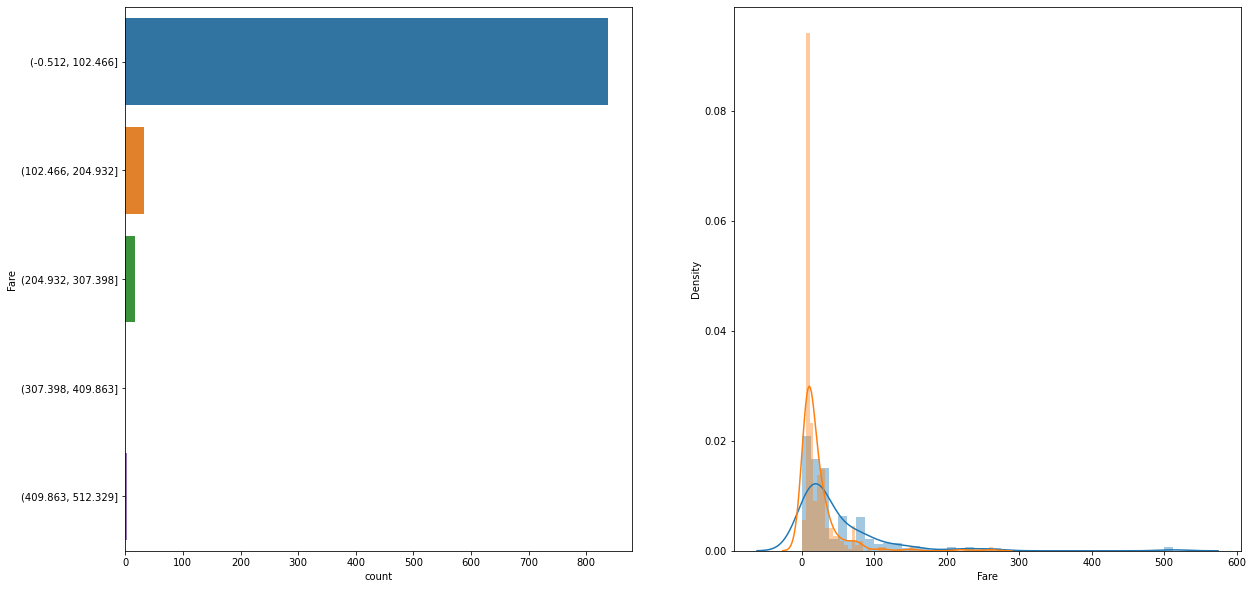

In [80]:
plot_count_dist(
data= train,
bin_df=df_bin,
label_column='Survived',
target_column='Fare',
figsize=(20,10),
use_bin_df=True)

In [81]:
train.Cabin

0                  NaN
1                  C85
2                  NaN
3                 C123
4                  NaN
5                  NaN
6                  E46
7                  NaN
8                  NaN
9                  NaN
10                  G6
11                C103
12                 NaN
13                 NaN
14                 NaN
15                 NaN
16                 NaN
17                 NaN
18                 NaN
19                 NaN
20                 NaN
21                 D56
22                 NaN
23                  A6
24                 NaN
25                 NaN
26                 NaN
27         C23 C25 C27
28                 NaN
29                 NaN
30                 NaN
31                 B78
32                 NaN
33                 NaN
34                 NaN
35                 NaN
36                 NaN
37                 NaN
38                 NaN
39                 NaN
40                 NaN
41                 NaN
42                 NaN
43         

In [82]:
linreg2 = LinearRegression()

In [83]:
train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
30            31         0       1   
31            32         1       1   
32            33         1       3   
33            34         0       2   
34            35         0       1   
35            36         0       1   
36            37         1       3   
37            38         0       3   
38            39         0       3   
39            40         1       3   
40            41         0       3   
41            42         0       2   
42            43         0       3   
43            44         1       2   
44            45         1       3   
45            46         0       3   
46            47         0       3   
47            48         1       3   
48            49         0       3   
49            50         0       3   
50            51         0       3   
51            52         0       3   
52            53         1       1   
53            54         1       2   
54            55         0       1   
55            56         1       1   
56            57         1       2   
57            58         0       3   
58            59         1       2   
59            60         0       3   
60            61         0       3   
61            62         1       1   
62            63         0       1   
63            64         0       3   
64            65         0       1   
65            66         1       3   
66            67         1       2   
67            68         0       3   
68            69         1       3   
69            70         0       3   
70            71         0       2   
71            72         0       3   
72            73         0       2   
73            74         0       3   
74            75         1       3   
75            76         0       3   
76            77         0       3   
77            78         0       3   
78            79         1       2   
79            80         1       3   
80            81         0       3   
81            82         1       3   
82            83         1       3   
83            84         0       1   
84            85         1       2   
85            86         1       3   
86            87         0       3   
87            88         0       3   
88            89         1       1   
89            90         0       3   
90            91         0       3   
91            92         0       3   
92            93         0       1   
93            94         0       3   
94            95         0       3   
95            96         0       3   
96            97         0       1   
97            98         1       1   
98            99         1       2   
99           100         0       2   
100          101         0       3   
101          102         0       3   
102          103         0       1   
103          104         0       3   
104          10

In [84]:
data_age_with_null_cabin = train[['PassengerId', 'Pclass', 'Survived', 'SibSp', 'Parch', 'Cabin','Fare', 'Age']]
data_age_with_null_cabin['Cabin_num'] = [x[0] if isinstance(x, str) else np.nan for x in data_age_with_null_cabin['Cabin']]

<ipython-input-84-a9af7986848e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_age_with_null_cabin['Cabin_num'] = [x[0] if isinstance(x, str) else np.nan for x in data_age_with_null_cabin['Cabin']]


In [85]:
mapping = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7}

In [86]:
for k,v in mapping.items():
    v = str(v)
    data_age_with_null_cabin["Cabin"] = data_age_with_null_cabin["Cabin"].str.replace(k,v)

<ipython-input-86-6e247f9ecc15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_age_with_null_cabin["Cabin"] = data_age_with_null_cabin["Cabin"].str.replace(k,v)


In [87]:
data_age_with_null_cabin

PassengerId  Pclass  Survived  SibSp  Parch            Cabin      Fare  \
0              1       3         0      1      0              NaN    7.2500   
1              2       1         1      1      0              385   71.2833   
2              3       3         1      0      0              NaN    7.9250   
3              4       1         1      1      0             3123   53.1000   
4              5       3         0      0      0              NaN    8.0500   
5              6       3         0      0      0              NaN    8.4583   
6              7       1         0      0      0              546   51.8625   
7              8       3         0      3      1              NaN   21.0750   
8              9       3         1      0      2              NaN   11.1333   
9             10       2         1      1      0              NaN   30.0708   
10            11       3         1      1      1               76   16.7000   
11            12       1         1      0      0             3103   26.5500   
12            13       3         0      0      0              NaN    8.0500   
13            14       3         0      1      5              NaN   31.2750   
14            15       3         0      0      0              NaN    7.8542   
15            16       2         1      0      0              NaN   16.0000   
16            17       3         0      4      1              NaN   29.1250   
17            18       2         1      0      0              NaN   13.0000   
18            19       3         0      1      0              NaN   18.0000   
19            20       3         1      0      0              NaN    7.2250   
20            21       2         0      0      0              NaN   26.0000   
21            22       2         1      0      0              456   13.0000   
22            23       3         1      0      0              NaN    8.0292   
23            24       1         1      0      0               16   35.5000   
24            25       3         0      3      1              NaN   21.0750   
25            26       3         1      1      5              NaN   31.3875   
26            27       3         0      0      0              NaN    7.2250   
27            28       1         0      3      2      323 325 327  263.0000   
28            29       3         1      0      0              NaN    7.8792   
29            30       3         0      0      0              NaN    7.8958   
30            31       1         0      0      0              NaN   27.7208   
31            32       1         1      1      0              278  146.5208   
32            33       3         1      0      0              NaN    7.7500   
33            34       2         0      0      0              NaN   10.5000   
34            35       1         0      1      0              NaN   82.1708   
35            36       1         0      1      0              NaN   52.0000   
36            37       3         1      0      0              NaN    7.2292   
37            38       3         0      0      0              NaN    8.0500   
38            39       3         0      2      0              NaN   18.0000   
39            40       3         1      1      0              NaN   11.2417   
40            41       3         0      1      0              NaN    9.4750   
41            42       2         0      1      0              NaN   21.0000   
42            43       3         0      0      0              NaN    7.8958   
43            44       2         1      1      2              NaN   41.5792   
44            45       3         1      0      0              NaN    7.8792   
45            46       3         0      0      0              NaN    8.0500   
46            47       3         0      1      0              NaN   15.5000   
47            48       3         1      0      0              NaN    7.7500   
48            49       3         0      2      0              NaN   21.6792   
49            50       3         0      1      0       

In [88]:
data_age_with_null_cabin

PassengerId  Pclass  Survived  SibSp  Parch            Cabin      Fare  \
0              1       3         0      1      0              NaN    7.2500   
1              2       1         1      1      0              385   71.2833   
2              3       3         1      0      0              NaN    7.9250   
3              4       1         1      1      0             3123   53.1000   
4              5       3         0      0      0              NaN    8.0500   
5              6       3         0      0      0              NaN    8.4583   
6              7       1         0      0      0              546   51.8625   
7              8       3         0      3      1              NaN   21.0750   
8              9       3         1      0      2              NaN   11.1333   
9             10       2         1      1      0              NaN   30.0708   
10            11       3         1      1      1               76   16.7000   
11            12       1         1      0      0             3103   26.5500   
12            13       3         0      0      0              NaN    8.0500   
13            14       3         0      1      5              NaN   31.2750   
14            15       3         0      0      0              NaN    7.8542   
15            16       2         1      0      0              NaN   16.0000   
16            17       3         0      4      1              NaN   29.1250   
17            18       2         1      0      0              NaN   13.0000   
18            19       3         0      1      0              NaN   18.0000   
19            20       3         1      0      0              NaN    7.2250   
20            21       2         0      0      0              NaN   26.0000   
21            22       2         1      0      0              456   13.0000   
22            23       3         1      0      0              NaN    8.0292   
23            24       1         1      0      0               16   35.5000   
24            25       3         0      3      1              NaN   21.0750   
25            26       3         1      1      5              NaN   31.3875   
26            27       3         0      0      0              NaN    7.2250   
27            28       1         0      3      2      323 325 327  263.0000   
28            29       3         1      0      0              NaN    7.8792   
29            30       3         0      0      0              NaN    7.8958   
30            31       1         0      0      0              NaN   27.7208   
31            32       1         1      1      0              278  146.5208   
32            33       3         1      0      0              NaN    7.7500   
33            34       2         0      0      0              NaN   10.5000   
34            35       1         0      1      0              NaN   82.1708   
35            36       1         0      1      0              NaN   52.0000   
36            37       3         1      0      0              NaN    7.2292   
37            38       3         0      0      0              NaN    8.0500   
38            39       3         0      2      0              NaN   18.0000   
39            40       3         1      1      0              NaN   11.2417   
40            41       3         0      1      0              NaN    9.4750   
41            42       2         0      1      0              NaN   21.0000   
42            43       3         0      0      0              NaN    7.8958   
43            44       2         1      1      2              NaN   41.5792   
44            45       3         1      0      0              NaN    7.8792   
45            46       3         0      0      0              NaN    8.0500   
46            47       3         0      1      0              NaN   15.5000   
47            48       3         1      0      0              NaN    7.7500   
48            49       3         0      2      0              NaN   21.6792   
49            50       3         0      1      0       

In [89]:
data_age_with_null_cabin

PassengerId  Pclass  Survived  SibSp  Parch            Cabin      Fare  \
0              1       3         0      1      0              NaN    7.2500   
1              2       1         1      1      0              385   71.2833   
2              3       3         1      0      0              NaN    7.9250   
3              4       1         1      1      0             3123   53.1000   
4              5       3         0      0      0              NaN    8.0500   
5              6       3         0      0      0              NaN    8.4583   
6              7       1         0      0      0              546   51.8625   
7              8       3         0      3      1              NaN   21.0750   
8              9       3         1      0      2              NaN   11.1333   
9             10       2         1      1      0              NaN   30.0708   
10            11       3         1      1      1               76   16.7000   
11            12       1         1      0      0             3103   26.5500   
12            13       3         0      0      0              NaN    8.0500   
13            14       3         0      1      5              NaN   31.2750   
14            15       3         0      0      0              NaN    7.8542   
15            16       2         1      0      0              NaN   16.0000   
16            17       3         0      4      1              NaN   29.1250   
17            18       2         1      0      0              NaN   13.0000   
18            19       3         0      1      0              NaN   18.0000   
19            20       3         1      0      0              NaN    7.2250   
20            21       2         0      0      0              NaN   26.0000   
21            22       2         1      0      0              456   13.0000   
22            23       3         1      0      0              NaN    8.0292   
23            24       1         1      0      0               16   35.5000   
24            25       3         0      3      1              NaN   21.0750   
25            26       3         1      1      5              NaN   31.3875   
26            27       3         0      0      0              NaN    7.2250   
27            28       1         0      3      2      323 325 327  263.0000   
28            29       3         1      0      0              NaN    7.8792   
29            30       3         0      0      0              NaN    7.8958   
30            31       1         0      0      0              NaN   27.7208   
31            32       1         1      1      0              278  146.5208   
32            33       3         1      0      0              NaN    7.7500   
33            34       2         0      0      0              NaN   10.5000   
34            35       1         0      1      0              NaN   82.1708   
35            36       1         0      1      0              NaN   52.0000   
36            37       3         1      0      0              NaN    7.2292   
37            38       3         0      0      0              NaN    8.0500   
38            39       3         0      2      0              NaN   18.0000   
39            40       3         1      1      0              NaN   11.2417   
40            41       3         0      1      0              NaN    9.4750   
41            42       2         0      1      0              NaN   21.0000   
42            43       3         0      0      0              NaN    7.8958   
43            44       2         1      1      2              NaN   41.5792   
44            45       3         1      0      0              NaN    7.8792   
45            46       3         0      0      0              NaN    8.0500   
46            47       3         0      1      0              NaN   15.5000   
47            48       3         1      0      0              NaN    7.7500   
48            49       3         0      2      0              NaN   21.6792   
49            50       3         0      1      0       

In [90]:
data_age_no_null_cabin = train[['PassengerId', 'Pclass', 'Survived', 'SibSp', 'Parch', 'Cabin','Fare', 'Age']].dropna()

In [91]:
data_age_no_null_cabin.sort_values('Fare')

PassengerId  Pclass  Survived  SibSp  Parch            Cabin      Fare  \
263          264       1         0      0      0              B94    0.0000   
815          816       1         0      0      0             B102    0.0000   
806          807       1         0      0      0              A36    0.0000   
872          873       1         0      0      0      B51 B53 B55    5.0000   
75            76       3         0      0      0            F G73    7.6500   
699          700       3         0      0      0            F G63    7.6500   
715          716       3         0      0      0            F G73    7.6500   
776          777       3         0      0      0              F38    7.7500   
429          430       3         1      0      0              E10    8.0500   
205          206       3         0      0      1               G6   10.4625   
251          252       3         0      1      1               G6   10.4625   
717          718       2         1      0      0             E101   10.5000   
772          773       2         0      0      0              E77   10.5000   
66            67       2         1      0      0              F33   10.5000   
516          517       2         1      0      0              F33   10.5000   
303          304       2         1      0      0             E101   12.3500   
751          752       3         1      0      1             E121   12.4750   
823          824       3         1      0      1             E121   12.4750   
292          293       2         0      0      0                D   12.8750   
123          124       2         1      0      0             E101   13.0000   
327          328       2         1      0      0                D   13.0000   
21            22       2         1      0      0              D56   13.0000   
345          346       2         1      0      0              F33   13.0000   
473          474       2         1      0      0                D   13.7917   
394          395       3         1      0      2               G6   16.7000   
10            11       3         1      1      1               G6   16.7000   
128          129       3         1      1      1            F E69   22.3583   
662          663       1         0      0      0              E58   25.5875   
796          797       1         1      0      0              D17   25.9292   
862          863       1         1      0      0              D17   25.9292   
340          341       2         1      1      1               F2   26.0000   
193          194       2         1      1      1               F2   26.0000   
284          285       1         0      0      0              A19   26.0000   
148          149       2         0      0      2               F2   26.0000   
136          137       1         1      0      2              D47   26.2833   
701          702       1         1      0      0              E24   26.2875   
707          708       1         1      0      0              E24   26.2875   
512          513       1         1      0      0              E25   26.2875   
572          573       1         1      0      0              E25   26.3875   
456          457       1         0      0      0              E38   26.5500   
460          461       1         1      0      0              E12   26.5500   
430          431       1         1      0      0              C52   26.5500   
536          537       1         0      0      0              B38   26.5500   
711          712       1         0      0      0             C124   26.5500   
252          253       1         0      0      0              C87   26.5500   
11            12       1         1      0      0             C103   26.5500   
857          858       1         1      0      0              E17   26.5500   
194          195       1         1      0      0               B4   27.7208   
452          453       1         0      0      0             C111   27.7500   
331          332       1         0      0      0       

In [92]:
x_ax = data_age_no_null_cabin.Fare.sort_values()
y_ax = data_age_no_null_cabin.Cabin


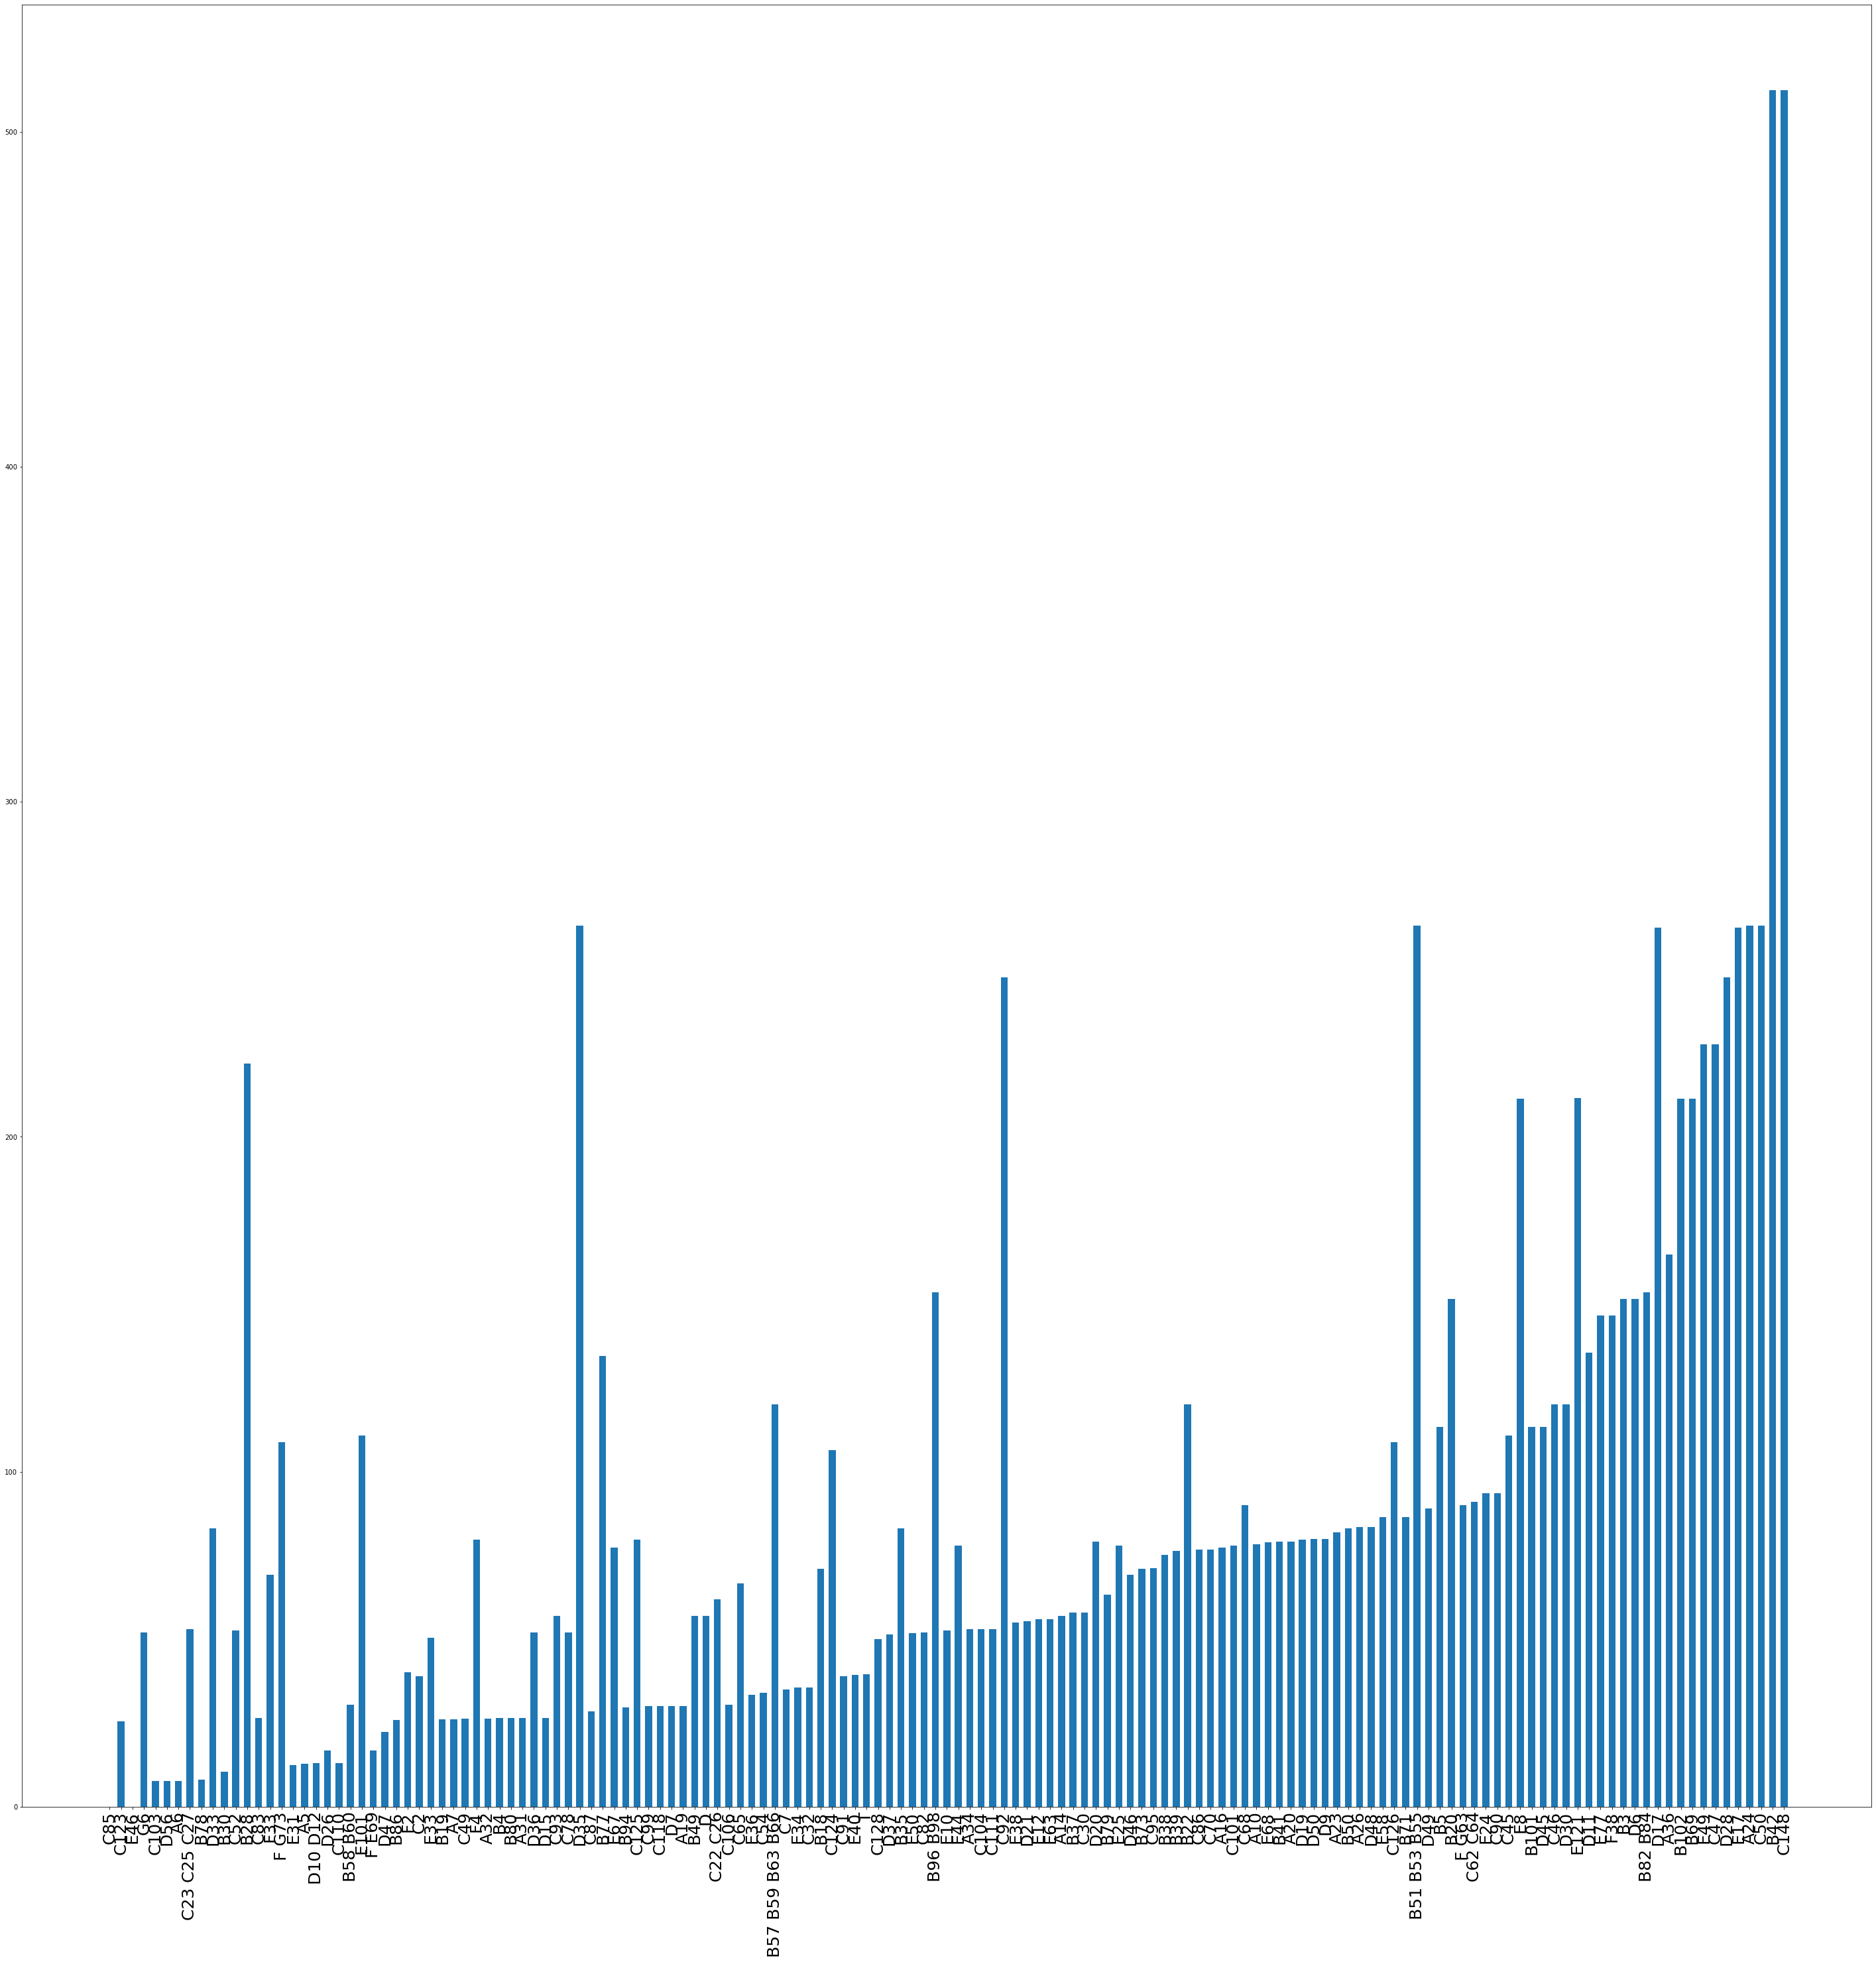

In [93]:
plt.figure(figsize=(50,50))
plt.bar(y_ax, x_ax,width=0.6)
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=25)


In [94]:
y_ax

1                  C85
3                 C123
6                  E46
10                  G6
11                C103
21                 D56
23                  A6
27         C23 C25 C27
31                 B78
52                 D33
54                 B30
55                 C52
61                 B28
62                 C83
66                 F33
75               F G73
88         C23 C25 C27
92                 E31
96                  A5
97             D10 D12
102                D26
110               C110
118            B58 B60
123               E101
124                D26
128              F E69
136                D47
137               C123
139                B86
148                 F2
151                 C2
166                E33
170                B19
174                 A7
177                C49
183                 F4
185                A32
193                 F2
194                 B4
195                B80
205                 G6
209                A31
215                D36
218        

In [95]:
data_age_no_null_cabin

PassengerId  Pclass  Survived  SibSp  Parch            Cabin      Fare  \
1              2       1         1      1      0              C85   71.2833   
3              4       1         1      1      0             C123   53.1000   
6              7       1         0      0      0              E46   51.8625   
10            11       3         1      1      1               G6   16.7000   
11            12       1         1      0      0             C103   26.5500   
21            22       2         1      0      0              D56   13.0000   
23            24       1         1      0      0               A6   35.5000   
27            28       1         0      3      2      C23 C25 C27  263.0000   
31            32       1         1      1      0              B78  146.5208   
52            53       1         1      1      0              D33   76.7292   
54            55       1         0      0      1              B30   61.9792   
55            56       1         1      0      0              C52   35.5000   
61            62       1         1      0      0              B28   80.0000   
62            63       1         0      1      0              C83   83.4750   
66            67       2         1      0      0              F33   10.5000   
75            76       3         0      0      0            F G73    7.6500   
88            89       1         1      3      2      C23 C25 C27  263.0000   
92            93       1         0      1      0              E31   61.1750   
96            97       1         0      0      0               A5   34.6542   
97            98       1         1      0      1          D10 D12   63.3583   
102          103       1         0      0      1              D26   77.2875   
110          111       1         0      0      0             C110   52.0000   
118          119       1         0      0      1          B58 B60  247.5208   
123          124       2         1      0      0             E101   13.0000   
124          125       1         0      0      1              D26   77.2875   
128          129       3         1      1      1            F E69   22.3583   
136          137       1         1      0      2              D47   26.2833   
137          138       1         0      1      0             C123   53.1000   
139          140       1         0      0      0              B86   79.2000   
148          149       2         0      0      2               F2   26.0000   
151          152       1         1      1      0               C2   66.6000   
166          167       1         1      0      1              E33   55.0000   
170          171       1         0      0      0              B19   33.5000   
174          175       1         0      0      0               A7   30.6958   
177          178       1         0      0      0              C49   28.7125   
183          184       2         1      2      1               F4   39.0000   
185          186       1         0      0      0              A32   50.0000   
193          194       2         1      1      1               F2   26.0000   
194          195       1         1      0      0               B4   27.7208   
195          196       1         1      0      0              B80  146.5208   
205          206       3         0      0      1               G6   10.4625   
209          210       1         1      0      0              A31   31.0000   
215          216       1         1      1      0              D36  113.2750   
218          219       1         1      0      0              D15   76.2917   
224          225       1         1      1      0              C93   90.0000   
230          231       1         1      1      0              C83   83.4750   
245          246       1         0      2      0              C78   90.0000   
248          249       1         1      1      1              D35   52.5542   
251          252       3         0      1      1               G6   10.4625   
252          253       1         0      0      0       

In [96]:
train_cabin =  data_age_no_null_cabin.loc[:, data_age_no_null_cabin.columns != 'Cabin']

In [97]:
train_cabin 

PassengerId  Pclass  Survived  SibSp  Parch      Fare        Age
1              2       1         1      1      0   71.2833  38.000000
3              4       1         1      1      0   53.1000  35.000000
6              7       1         0      0      0   51.8625  54.000000
10            11       3         1      1      1   16.7000   4.000000
11            12       1         1      0      0   26.5500  58.000000
21            22       2         1      0      0   13.0000  34.000000
23            24       1         1      0      0   35.5000  28.000000
27            28       1         0      3      2  263.0000  19.000000
31            32       1         1      1      0  146.5208  32.187716
52            53       1         1      1      0   76.7292  49.000000
54            55       1         0      0      1   61.9792  65.000000
55            56       1         1      0      0   35.5000  37.838018
61            62       1         1      0      0   80.0000  38.000000
62            63       1         0      1      0   83.4750  45.000000
66            67       2         1      0      0   10.5000  29.000000
75            76       3         0      0      0    7.6500  25.000000
88            89       1         1      3      2  263.0000  23.000000
92            93       1         0      1      0   61.1750  46.000000
96            97       1         0      0      0   34.6542  71.000000
97            98       1         1      0      1   63.3583  23.000000
102          103       1         0      0      1   77.2875  21.000000
110          111       1         0      0      0   52.0000  47.000000
118          119       1         0      0      1  247.5208  24.000000
123          124       2         1      0      0   13.0000  32.500000
124          125       1         0      0      1   77.2875  54.000000
128          129       3         1      1      1   22.3583  17.220608
136          137       1         1      0      2   26.2833  19.000000
137          138       1         0      1      0   53.1000  37.000000
139          140       1         0      0      0   79.2000  24.000000
148          149       2         0      0      2   26.0000  36.500000
151          152       1         1      1      0   66.6000  22.000000
166          167       1         1      0      1   55.0000  36.791271
170          171       1         0      0      0   33.5000  61.000000
174          175       1         0      0      0   30.6958  56.000000
177          178       1         0      0      0   28.7125  50.000000
183          184       2         1      2      1   39.0000   1.000000
185          186       1         0      0      0   50.0000  44.451335
193          194       2         1      1      1   26.0000   3.000000
194          195       1         1      0      0   27.7208  44.000000
195          196       1         1      0      0  146.5208  58.000000
205          206       3         0      0      1   10.4625   2.000000
209          210       1         1      0      0   31.0000  40.000000
215          216       1         1      1      0  113.2750  31.000000
218          219       1         1      0      0   76.2917  32.000000
224          225       1         1      1      0   90.0000  38.000000
230          231       1         1      1      0   83.4750  35.000000
245          246       1         0      2      0   90.0000  44.000000
248          249       1         1      1      1   52.5542  37.000000
251          252       3         0      1      1   10.4625  29.000000
252          253       1         0      0      0   26.5500  62.000000
257          258       1         1      0      0   86.5000  30.000000
262          263       1         0      1      1   79.6500  52.000000
263          264       1         0      0      0    0.0000  40.000000
268          269       1         1      0      1  153.4625  58.000000
269          270       1         1      0      0  135.6333  35.000000
273          274       1         0      0      1   29.7000  37.000000
275          27

In [98]:
train_cabin_y = data_age_no_null_cabin.loc[:, data_age_no_null_cabin.columns == 'Cabin']

In [99]:
train_cabin_y

Cabin
1                C85
3               C123
6                E46
10                G6
11              C103
21               D56
23                A6
27       C23 C25 C27
31               B78
52               D33
54               B30
55               C52
61               B28
62               C83
66               F33
75             F G73
88       C23 C25 C27
92               E31
96                A5
97           D10 D12
102              D26
110             C110
118          B58 B60
123             E101
124              D26
128            F E69
136              D47
137             C123
139              B86
148               F2
151               C2
166              E33
170              B19
174               A7
177              C49
183               F4
185              A32
193               F2
194               B4
195              B80
205               G6
209              A31
215              D36
218              D15
224              C93
230              C83
245              C78
248              D35
251               G6
252              C87
257              B77
262              E67
263              B94
268             C125
269              C99
273             C118
275               D7
284              A19
291              B49
292                D
297          C22 C26
298             C106
299          B58 B60
303             E101
305          C22 C26
307              C65
309              E36
310              C54
311  B57 B59 B63 B66
318               C7
319              E34
325              C32
327                D
329              B18
331             C124
332              C91
336               C2
337              E40
339                T
340               F2
341      C23 C25 C27
345              F33
351             C128
356              E33
366              D37
369              B35
370              E50
377              C82
390          B96 B98
393              D36
394               G6
412              C78
429              E10
430              C52
434              E44
435          B96 B98
438      C23 C25 C27
445              A34
449             C104
452             C111
453              C92
456              E38
457              D21
460              E12
462              E63
473                D
475              A14
484              B49
486              C93
487              B37
492              C30
496              D20
498          C22 C26
504              B79
505              C65
512              E25
515              D46
516              F33
520              B73
523              B18
527              C95
536              B38
539              B39
540              B22
544              C86
550              C70
556              A16
558              E67
571             C101
572              E25
577              E44
581              C68
583              A10
585              E68
587              B41
591              D20
599              A20
609             C125
618               F4
621              D19
625              D50
627               D9
630              A23
632              B50
641              B35
645              D33
647              A26
659              D48
662              E58
669             C126
671              B71
679      B51 B53 B55
681              D49
689               B5
690              B20
698              C68
699            F G63
700          C62 C64
701              E24
707              E24
710              C90
711             C124
712             C126
715            F G73
716              C45
717             E101
724               E8
730               B5
737             B101
740              D45
741              C46
742  B57 B59 B63 B66
745              B22
748              D30
751             E121
759              B77
763          B96 B98
765              D11
772              E77
776              F38
779               B3
781              B20
782               D6
789          B82 B84
796              D17
802          B96 B98
806              A36
809               E8
815             B102
820              B69
823 

In [100]:
missing_values['Embarked']

2

In [101]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Embarked'>

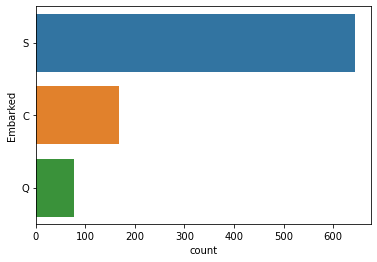

In [102]:
sns.countplot(y='Embarked',data=train)

In [103]:
train.Embarked = train.Embarked.apply(lambda x: x if isinstance(x, str) else 'S' )

In [104]:
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

In [105]:
df_bin.head()

Survived  Pclass  Sex               Age  SibSp  Parch               Fare  \
0         0       3    0   (20.23, 28.768]      1      0  (-0.512, 102.466]   
1         1       1    1  (37.307, 45.846]      1      0  (-0.512, 102.466]   
2         1       3    1   (20.23, 28.768]      0      0  (-0.512, 102.466]   
3         1       1    1  (28.768, 37.307]      1      0  (-0.512, 102.466]   
4         0       3    0  (28.768, 37.307]      0      0  (-0.512, 102.466]   

  Embarked  
0        S  
1        C  
2        S  
3        S  
4        S

In [106]:
df_con['Fare'] = train['Fare'] 
df_bin['Fare'] = pd.cut(train['Fare'], bins=5) # discretised

In [107]:
train['cabin_multiple'] = train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

In [108]:
train['cabin_adv'] = train.Cabin.apply(lambda x: str(x)[0])

In [109]:
train['numeric_ticket'] = train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train['ticket_letters'] = train.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [110]:
train['name_title'] = train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [132]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv
import catboost


In [111]:
train['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([train,test])

In [112]:
train.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  title  Fare_class  \
0      0         A/5 21171   7.2500   NaN        S      1           1   
1      0          PC 17599  71.2833   C85        C      2           4   
2      0  STON/O2. 3101282   7.9250   NaN        S      0           1   
3      0            113803  53.1000  C123        S      2           3   
4      0            373450   8.0500   NaN        S      1           1   

   cabin_multiple cabin_adv  numeric_ticket ticket_letters name_title  \
0               0         n               0             a5         Mr   
1               1         C               0             pc        Mrs   
2               0         n               0         stono2       Miss   
3               1         C               1              0        Mrs   
4               0         n               1              0         Mr   

   train_test  
0           1  
1           1  
2           1  
3           1  
4           1

In [113]:
all_data

PassengerId  Survived  Pclass  \
0              1       0.0       3   
1              2       1.0       1   
2              3       1.0       3   
3              4       1.0       1   
4              5       0.0       3   
..           ...       ...     ...   
413         1305       NaN       3   
414         1306       NaN       1   
415         1307       NaN       3   
416         1308       NaN       3   
417         1309       NaN       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
413                                 Spector, Mr. Woolf    male   NaN      0   
414                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
415                       Saether, Mr. Simon Sivertsen    male  38.5      0   
416                                Ware, Mr. Frederick    male   NaN      0   
417                           Peter, Master. Michael J    male   NaN      1   

     Parch              Ticket      Fare Cabin Embarked  title  Fare_class  \
0        0           A/5 21171    7.2500   NaN        S    1.0         1.0   
1        0            PC 17599   71.2833   C85        C    2.0         4.0   
2        0    STON/O2. 3101282    7.9250   NaN        S    0.0         1.0   
3        0              113803   53.1000  C123        S    2.0         3.0   
4        0              373450    8.0500   NaN        S    1.0         1.0   
..     ...                 ...       ...   ...      ...    ...         ...   
413      0           A.5. 3236    8.0500   NaN        S    NaN         NaN   
414      0            PC 17758  108.9000  C105        C    NaN         NaN   
415      0  SOTON/O.Q. 3101262    7.2500   NaN        S    NaN         NaN   
416      0              359309    8.0500   NaN        S    NaN         NaN   
417      1                2668   22.3583   NaN        C    NaN         NaN   

     cabin_multiple cabin_adv  numeric_ticket ticket_letters name_title  \
0               0.0         n             0.0             a5         Mr   
1               1.0         C             0.0             pc        Mrs   
2               0.0         n             0.0         stono2       Miss   
3               1.0         C             1.0              0        Mrs   
4               0.0         n             1.0              0         Mr   
..              ...       ...             ...            ...        ...   
413             NaN       NaN             NaN            NaN        NaN   
414             NaN       NaN             NaN            NaN        NaN   
415             NaN       NaN             NaN            NaN        NaN   
416             NaN       NaN             NaN            NaN        NaN   
417             NaN       NaN             NaN            NaN        NaN   

     train_test  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
413           0  
414           0  
415           0  
416           0  
417           0  

[1309 rows x 20 columns]

(891,)

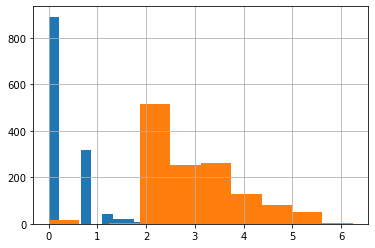

In [114]:
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

#impute nulls for continuous data 
#all_data.Age = all_data.Age.fillna(training.Age.mean())
all_data.Age = all_data.Age.fillna(train.Age.median())
#all_data.Fare = all_data.Fare.fillna(training.Fare.mean())
all_data.Fare = all_data.Fare.fillna(train.Fare.median())

#drop null 'embarked' rows. Only 2 instances of this in training and 0 in test 
all_data.dropna(subset=['Embarked'],inplace = True)

#tried log norm of sibsp (not used)
all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
all_data['norm_sibsp'].hist()

# log norm of fare (used)
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

# converted fare to category for pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)

#created dummy variables from categories (also can use OneHotEncoder)
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']])

#Split to train test again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)


y_train = all_data[all_data.train_test==1].Survived
y_train.shape

NameError: name 'all_dummies_scaled' is not defined

In [116]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived

In [117]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [118]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.67039106 0.70224719 0.75842697 0.74719101 0.73595506]
0.722842257234323


In [119]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82681564 0.83146067 0.80337079 0.83146067 0.85955056]
0.8305316678174629


In [120]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82122905 0.83146067 0.80337079 0.83146067 0.85955056]
0.8294143493817087


In [121]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.78212291 0.79775281 0.84269663 0.74719101 0.81460674]
0.7968740192078337


In [122]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.77653631 0.79775281 0.84269663 0.74719101 0.81460674]
0.7957567007720796


In [123]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.77653631 0.81460674 0.82022472 0.83707865 0.85955056]
0.8215993974012932


In [124]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81005587 0.78651685 0.84269663 0.79775281 0.86516854]
0.8204381394764922


In [125]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82122905 0.81460674 0.85393258 0.7752809  0.87078652]
0.8271671583704727


In [126]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81564246 0.81460674 0.85393258 0.78089888 0.87078652]
0.8271734354403364


In [127]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82681564 0.8258427  0.82022472 0.80337079 0.85955056]
0.8271608813006089


In [138]:

RFC = GradientBoostingClassifier()
cv = cross_val_score(RFC, X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())


[0.84357542 0.83146067 0.83707865 0.83146067 0.86516854]
0.8417487916640513


In [139]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82681564 0.8258427  0.82022472 0.80337079 0.85955056]
0.8271608813006089


In [140]:
#one-hotencode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)
df_bin_enc.head()

Survived  Pclass_1  Pclass_2  Pclass_3  Sex_0  Sex_1  Age_(-5.471, 3.153]  \
0         0         0         0         1      1      0                    0   
1         1         1         0         0      0      1                    0   
2         1         0         0         1      0      1                    0   
3         1         1         0         0      0      1                    0   
4         0         0         0         1      1      0                    0   

   Age_(3.153, 11.691]  Age_(11.691, 20.23]  Age_(20.23, 28.768]  \
0                    0                    0                    1   
1                    0                    0                    0   
2                    0                    0                    1   
3                    0                    0                    0   
4                    0                    0                    0   

   Age_(28.768, 37.307]  Age_(37.307, 45.846]  Age_(45.846, 54.384]  \
0                     0                     0                     0   
1                     0                     1                     0   
2                     0                     0                     0   
3                     1                     0                     0   
4                     1                     0                     0   

   Age_(54.384, 62.923]  Age_(62.923, 71.461]  Age_(71.461, 80.0]  SibSp_0  \
0                     0                     0                   0        0   
1                     0                     0                   0        0   
2                     0                     0                   0        1   
3                     0                     0                   0        0   
4                     0                     0                   0        1   

   SibSp_1  SibSp_2  SibSp_3  SibSp_4  SibSp_5  SibSp_8  Parch_0  Parch_1  \
0        1        0        0        0        0        0        1        0   
1        1        0        0        0        0        0        1        0   
2        0        0        0        0        0        0        1        0   
3        1        0        0        0        0        0        1        0   
4        0        0        0        0        0        0        1        0   

   Parch_2  Parch_3  Parch_4  Parch_5  Parch_6  Fare_(-0.512, 102.466]  \
0        0        0        0        0        0                       1   
1        0        0        0        0        0                       1   
2        0        0        0        0        0                       1   
3        0        0        0        0        0                       1   
4        0        0        0        0        0                       1   

   Fare_(102.466, 204.932]  Fare_(204.932, 307.398]  Fare_(307.398, 409.863]  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   Fare_(409.863, 512.329]  Embarked_C  Embarked_Q  Embarked_S  
0                        0           0           0           1  
1                        0           1           0           0  
2                        0           0           0           1  
3                        0           0           0           1  
4                        0           0           0           1

In [141]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
df_con_enc = df_con.apply(LabelEncoder().fit_transform)
df_con_enc.head()


Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0         0       2    1   54      1      0    18         2
1         1       0    0  209      1      0   207         0
2         1       2    0   91      0      0    41         2
3         1       0    0  193      1      0   189         2
4         0       2    1  193      0      0    43         2

In [142]:
selected_df = df_con_enc

In [143]:
X_train = selected_df.drop('Survived', axis = 1)
y_train = selected_df.Survived

In [144]:
X_train.shape

(891, 7)

In [145]:

# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [146]:
# Logistic Regression
import math, time, random, datetime
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

C:\Users\mat_c\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 81.14
Accuracy CV 10-Fold: 80.81
Running Time: 0:00:03.361118


In [147]:

# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 80.02
Accuracy CV 10-Fold: 69.02
Running Time: 0:00:01.882423


In [148]:

# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 76.77
Accuracy CV 10-Fold: 76.43
Running Time: 0:00:00.034006


In [149]:

# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 41.64
Accuracy CV 10-Fold: 70.15
Running Time: 0:00:00.073019


C:\Users\mat_c\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [150]:

# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 73.63
Accuracy CV 10-Fold: 62.63
Running Time: 0:00:00.032015


In [151]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 98.88
Accuracy CV 10-Fold: 78.34
Running Time: 0:00:00.075010


In [152]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 90.12
Accuracy CV 10-Fold: 84.85
Running Time: 0:00:00.284056


In [153]:
train_pred_gbt

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,

In [154]:
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [155]:

# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train, 
                  y_train,
                  cat_features)

In [156]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [157]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009807
0:	learn: 0.6876834	total: 249ms	remaining: 4m 8s
1:	learn: 0.6819502	total: 318ms	remaining: 2m 38s
2:	learn: 0.6769596	total: 435ms	remaining: 2m 24s
3:	learn: 0.6717958	total: 530ms	remaining: 2m 11s
4:	learn: 0.6662301	total: 599ms	remaining: 1m 59s
5:	learn: 0.6612874	total: 734ms	remaining: 2m 1s
6:	learn: 0.6558140	total: 855ms	remaining: 2m 1s
7:	learn: 0.6510420	total: 990ms	remaining: 2m 2s
8:	learn: 0.6460273	total: 1.06s	remaining: 1m 56s
9:	learn: 0.6412868	total: 1.15s	remaining: 1m 53s
10:	learn: 0.6373515	total: 1.24s	remaining: 1m 51s
11:	learn: 0.6329172	total: 1.29s	remaining: 1m 46s
12:	learn: 0.6281643	total: 1.38s	remaining: 1m 44s
13:	learn: 0.6243749	total: 1.45s	remaining: 1m 41s
14:	learn: 0.6203464	total: 1.54s	remaining: 1m 41s
15:	learn: 0.6167659	total: 1.61s	remaining: 1m 39s
16:	learn: 0.6126728	total: 1.74s	remaining: 1m 40s
17:	learn: 0.6085565	total: 1.86s	remaining: 1m 41s
18:	learn: 0.6043707	total: 1.95s	remaining: 1m 

158:	learn: 0.4145735	total: 15s	remaining: 1m 19s
159:	learn: 0.4142108	total: 15.2s	remaining: 1m 20s
160:	learn: 0.4135050	total: 15.4s	remaining: 1m 20s
161:	learn: 0.4131271	total: 15.5s	remaining: 1m 20s
162:	learn: 0.4128341	total: 15.7s	remaining: 1m 20s
163:	learn: 0.4125542	total: 15.8s	remaining: 1m 20s
164:	learn: 0.4120662	total: 15.8s	remaining: 1m 20s
165:	learn: 0.4119499	total: 15.9s	remaining: 1m 19s
166:	learn: 0.4117308	total: 15.9s	remaining: 1m 19s
167:	learn: 0.4114093	total: 16s	remaining: 1m 19s
168:	learn: 0.4110865	total: 16s	remaining: 1m 18s
169:	learn: 0.4103942	total: 16s	remaining: 1m 18s
170:	learn: 0.4098295	total: 16.1s	remaining: 1m 18s
171:	learn: 0.4091150	total: 16.2s	remaining: 1m 17s
172:	learn: 0.4086868	total: 16.2s	remaining: 1m 17s
173:	learn: 0.4086301	total: 16.3s	remaining: 1m 17s
174:	learn: 0.4082675	total: 16.3s	remaining: 1m 16s
175:	learn: 0.4079780	total: 16.4s	remaining: 1m 16s
176:	learn: 0.4073707	total: 16.4s	remaining: 1m 16s
1

316:	learn: 0.3675947	total: 26.5s	remaining: 57.2s
317:	learn: 0.3674678	total: 26.6s	remaining: 57s
318:	learn: 0.3674648	total: 26.6s	remaining: 56.8s
319:	learn: 0.3668510	total: 26.6s	remaining: 56.6s
320:	learn: 0.3665371	total: 26.7s	remaining: 56.4s
321:	learn: 0.3663480	total: 26.7s	remaining: 56.3s
322:	learn: 0.3660071	total: 26.8s	remaining: 56.1s
323:	learn: 0.3660037	total: 26.8s	remaining: 55.9s
324:	learn: 0.3656655	total: 26.8s	remaining: 55.7s
325:	learn: 0.3654649	total: 26.9s	remaining: 55.6s
326:	learn: 0.3653789	total: 27s	remaining: 55.5s
327:	learn: 0.3649688	total: 27.1s	remaining: 55.4s
328:	learn: 0.3649068	total: 27.1s	remaining: 55.3s
329:	learn: 0.3644775	total: 27.2s	remaining: 55.2s
330:	learn: 0.3643138	total: 27.2s	remaining: 55.1s
331:	learn: 0.3640975	total: 27.3s	remaining: 55s
332:	learn: 0.3639338	total: 27.4s	remaining: 54.9s
333:	learn: 0.3637850	total: 27.5s	remaining: 54.8s
334:	learn: 0.3637703	total: 27.5s	remaining: 54.5s
335:	learn: 0.3636

475:	learn: 0.3384567	total: 37.1s	remaining: 40.9s
476:	learn: 0.3380513	total: 37.2s	remaining: 40.8s
477:	learn: 0.3378339	total: 37.3s	remaining: 40.7s
478:	learn: 0.3377483	total: 37.3s	remaining: 40.6s
479:	learn: 0.3375709	total: 37.4s	remaining: 40.5s
480:	learn: 0.3375629	total: 37.4s	remaining: 40.4s
481:	learn: 0.3375078	total: 37.5s	remaining: 40.3s
482:	learn: 0.3372495	total: 37.6s	remaining: 40.2s
483:	learn: 0.3371204	total: 37.7s	remaining: 40.2s
484:	learn: 0.3369788	total: 37.7s	remaining: 40s
485:	learn: 0.3367402	total: 37.8s	remaining: 39.9s
486:	learn: 0.3366238	total: 37.8s	remaining: 39.8s
487:	learn: 0.3366159	total: 37.9s	remaining: 39.7s
488:	learn: 0.3364221	total: 37.9s	remaining: 39.6s
489:	learn: 0.3364114	total: 38s	remaining: 39.6s
490:	learn: 0.3360046	total: 38.1s	remaining: 39.5s
491:	learn: 0.3360036	total: 38.1s	remaining: 39.3s
492:	learn: 0.3360000	total: 38.2s	remaining: 39.3s
493:	learn: 0.3359832	total: 38.3s	remaining: 39.2s
494:	learn: 0.33

635:	learn: 0.3142626	total: 47.7s	remaining: 27.3s
636:	learn: 0.3142045	total: 47.8s	remaining: 27.2s
637:	learn: 0.3141278	total: 47.8s	remaining: 27.1s
638:	learn: 0.3140892	total: 47.9s	remaining: 27.1s
639:	learn: 0.3139440	total: 48s	remaining: 27s
640:	learn: 0.3137518	total: 48.1s	remaining: 27s
641:	learn: 0.3136665	total: 48.2s	remaining: 26.9s
642:	learn: 0.3134101	total: 48.3s	remaining: 26.8s
643:	learn: 0.3132427	total: 48.4s	remaining: 26.7s
644:	learn: 0.3131039	total: 48.4s	remaining: 26.7s
645:	learn: 0.3130010	total: 48.5s	remaining: 26.6s
646:	learn: 0.3128204	total: 48.5s	remaining: 26.5s
647:	learn: 0.3127029	total: 48.6s	remaining: 26.4s
648:	learn: 0.3126459	total: 48.6s	remaining: 26.3s
649:	learn: 0.3123721	total: 48.7s	remaining: 26.2s
650:	learn: 0.3120852	total: 48.9s	remaining: 26.2s
651:	learn: 0.3119158	total: 48.9s	remaining: 26.1s
652:	learn: 0.3117745	total: 49s	remaining: 26s
653:	learn: 0.3117162	total: 49s	remaining: 25.9s
654:	learn: 0.3114908	to

795:	learn: 0.2925875	total: 59.7s	remaining: 15.3s
796:	learn: 0.2925665	total: 59.7s	remaining: 15.2s
797:	learn: 0.2923617	total: 59.8s	remaining: 15.1s
798:	learn: 0.2922318	total: 59.9s	remaining: 15.1s
799:	learn: 0.2920420	total: 60s	remaining: 15s
800:	learn: 0.2918743	total: 60s	remaining: 14.9s
801:	learn: 0.2918291	total: 1m	remaining: 14.8s
802:	learn: 0.2917633	total: 1m	remaining: 14.7s
803:	learn: 0.2917284	total: 1m	remaining: 14.7s
804:	learn: 0.2916881	total: 1m	remaining: 14.6s
805:	learn: 0.2916480	total: 1m	remaining: 14.5s
806:	learn: 0.2916112	total: 1m	remaining: 14.5s
807:	learn: 0.2914233	total: 1m	remaining: 14.4s
808:	learn: 0.2913365	total: 1m	remaining: 14.3s
809:	learn: 0.2912668	total: 1m	remaining: 14.2s
810:	learn: 0.2911512	total: 1m	remaining: 14.1s
811:	learn: 0.2910182	total: 1m	remaining: 14.1s
812:	learn: 0.2909267	total: 1m	remaining: 14s
813:	learn: 0.2907491	total: 1m	remaining: 13.9s
814:	learn: 0.2907155	total: 1m	remaining: 13.8s
815:	learn

955:	learn: 0.2746044	total: 1m 10s	remaining: 3.25s
956:	learn: 0.2745825	total: 1m 10s	remaining: 3.17s
957:	learn: 0.2744944	total: 1m 10s	remaining: 3.11s
958:	learn: 0.2744474	total: 1m 10s	remaining: 3.03s
959:	learn: 0.2743361	total: 1m 10s	remaining: 2.96s
960:	learn: 0.2743035	total: 1m 11s	remaining: 2.88s
961:	learn: 0.2742119	total: 1m 11s	remaining: 2.81s
962:	learn: 0.2740047	total: 1m 11s	remaining: 2.73s
963:	learn: 0.2738687	total: 1m 11s	remaining: 2.66s
964:	learn: 0.2737244	total: 1m 11s	remaining: 2.58s
965:	learn: 0.2735817	total: 1m 11s	remaining: 2.51s
966:	learn: 0.2734764	total: 1m 11s	remaining: 2.44s
967:	learn: 0.2733325	total: 1m 11s	remaining: 2.36s
968:	learn: 0.2732270	total: 1m 11s	remaining: 2.29s
969:	learn: 0.2729803	total: 1m 11s	remaining: 2.22s
970:	learn: 0.2729465	total: 1m 11s	remaining: 2.14s
971:	learn: 0.2729239	total: 1m 11s	remaining: 2.07s
972:	learn: 0.2728738	total: 1m 11s	remaining: 2s
973:	learn: 0.2727700	total: 1m 12s	remaining: 1.

In [158]:
from catboost import CatBoostClassifier, Pool, cv
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6748189	test: 0.6749454	best: 0.6749454 (0)
1:	learn: 0.6590818	test: 0.6594748	best: 0.6594748 (1)
2:	learn: 0.6442004	test: 0.6452916	best: 0.6452916 (2)
3:	learn: 0.6298815	test: 0.6315324	best: 0.6315324 (3)
4:	learn: 0.6167523	test: 0.6189028	best: 0.6189028 (4)
5:	learn: 0.6051151	test: 0.6073438	best: 0.6073438 (5)
6:	learn: 0.5949884	test: 0.5976701	best: 0.5976701 (6)
7:	learn: 0.5849733	test: 0.5881592	best: 0.5881592 (7)
8:	learn: 0.5752062	test: 0.5787545	best: 0.5787545 (8)
9:	learn: 0.5662147	test: 0.5699715	best: 0.5699715 (9)
10:	learn: 0.5581104	test: 0.5625035	best: 0.5625035 (10)
11:	learn: 0.5501160	test: 0.5546613	best: 0.5546613 (11)	total: 7.51s	remaining: 10m 18s
12:	learn: 0.5425567	test: 0.5476562	best: 0.5476562 (12)
13:	learn: 0.5355316	test: 0.5412780	best: 0.5412780 (13)
14:	learn: 0.5288114	test: 0.5349544	best: 0.5349544 (14)
15:	learn: 0.5228520	test: 0.5296814	best: 0.5296814 (15)	total: 10.8s	remaining: 11m 3s
16:	learn: 0.5173713	test: 0.

150:	learn: 0.3451820	test: 0.4247517	best: 0.4245822 (148)
151:	learn: 0.3446153	test: 0.4246706	best: 0.4245822 (148)
152:	learn: 0.3441531	test: 0.4248506	best: 0.4245822 (148)
153:	learn: 0.3435822	test: 0.4249331	best: 0.4245822 (148)
154:	learn: 0.3431152	test: 0.4247311	best: 0.4245822 (148)
155:	learn: 0.3427488	test: 0.4247558	best: 0.4245822 (148)
156:	learn: 0.3423310	test: 0.4247481	best: 0.4245822 (148)
157:	learn: 0.3419227	test: 0.4249060	best: 0.4245822 (148)	total: 1m 45s	remaining: 9m 23s
158:	learn: 0.3414206	test: 0.4249108	best: 0.4245822 (148)
159:	learn: 0.3410472	test: 0.4250703	best: 0.4245822 (148)
160:	learn: 0.3405752	test: 0.4250539	best: 0.4245822 (148)
161:	learn: 0.3400541	test: 0.4253390	best: 0.4245822 (148)
162:	learn: 0.3395169	test: 0.4254156	best: 0.4245822 (148)
163:	learn: 0.3388452	test: 0.4251490	best: 0.4245822 (148)
164:	learn: 0.3383106	test: 0.4250908	best: 0.4245822 (148)
165:	learn: 0.3377577	test: 0.4252467	best: 0.4245822 (148)
166:	lea

281:	learn: 0.2907114	test: 0.4267830	best: 0.4245822 (148)
282:	learn: 0.2905089	test: 0.4268670	best: 0.4245822 (148)
283:	learn: 0.2902101	test: 0.4270537	best: 0.4245822 (148)
284:	learn: 0.2899465	test: 0.4270397	best: 0.4245822 (148)
285:	learn: 0.2894512	test: 0.4272397	best: 0.4245822 (148)
286:	learn: 0.2890133	test: 0.4272253	best: 0.4245822 (148)
287:	learn: 0.2886518	test: 0.4273561	best: 0.4245822 (148)	total: 3m 16s	remaining: 8m 4s
288:	learn: 0.2882844	test: 0.4272901	best: 0.4245822 (148)
289:	learn: 0.2879316	test: 0.4272517	best: 0.4245822 (148)
290:	learn: 0.2875936	test: 0.4274389	best: 0.4245822 (148)
291:	learn: 0.2873793	test: 0.4276463	best: 0.4245822 (148)
292:	learn: 0.2870136	test: 0.4275692	best: 0.4245822 (148)
293:	learn: 0.2866194	test: 0.4275533	best: 0.4245822 (148)	total: 3m 20s	remaining: 8m 1s
294:	learn: 0.2863384	test: 0.4275632	best: 0.4245822 (148)
295:	learn: 0.2860466	test: 0.4279019	best: 0.4245822 (148)
296:	learn: 0.2856411	test: 0.4278989	

409:	learn: 0.2494380	test: 0.4310595	best: 0.4245822 (148)
410:	learn: 0.2492173	test: 0.4312875	best: 0.4245822 (148)
411:	learn: 0.2488944	test: 0.4311489	best: 0.4245822 (148)
412:	learn: 0.2487040	test: 0.4311477	best: 0.4245822 (148)
413:	learn: 0.2484589	test: 0.4311505	best: 0.4245822 (148)	total: 4m 48s	remaining: 6m 48s
414:	learn: 0.2482213	test: 0.4310439	best: 0.4245822 (148)
415:	learn: 0.2479256	test: 0.4308775	best: 0.4245822 (148)
416:	learn: 0.2477116	test: 0.4308296	best: 0.4245822 (148)
417:	learn: 0.2473346	test: 0.4307600	best: 0.4245822 (148)	total: 4m 51s	remaining: 6m 46s
418:	learn: 0.2470214	test: 0.4307749	best: 0.4245822 (148)
419:	learn: 0.2467074	test: 0.4308170	best: 0.4245822 (148)
420:	learn: 0.2464758	test: 0.4309644	best: 0.4245822 (148)
421:	learn: 0.2461410	test: 0.4309598	best: 0.4245822 (148)	total: 4m 55s	remaining: 6m 44s
422:	learn: 0.2458042	test: 0.4310739	best: 0.4245822 (148)
423:	learn: 0.2454083	test: 0.4311315	best: 0.4245822 (148)
424:

538:	learn: 0.2164175	test: 0.4366059	best: 0.4245822 (148)
539:	learn: 0.2162120	test: 0.4366249	best: 0.4245822 (148)
540:	learn: 0.2160449	test: 0.4365379	best: 0.4245822 (148)
541:	learn: 0.2157946	test: 0.4366023	best: 0.4245822 (148)
542:	learn: 0.2155930	test: 0.4366057	best: 0.4245822 (148)	total: 6m 19s	remaining: 5m 18s
543:	learn: 0.2154240	test: 0.4365788	best: 0.4245822 (148)
544:	learn: 0.2151458	test: 0.4366178	best: 0.4245822 (148)	total: 6m 20s	remaining: 5m 18s
545:	learn: 0.2148943	test: 0.4368153	best: 0.4245822 (148)
546:	learn: 0.2145981	test: 0.4367041	best: 0.4245822 (148)
547:	learn: 0.2143370	test: 0.4368105	best: 0.4245822 (148)
548:	learn: 0.2141378	test: 0.4368146	best: 0.4245822 (148)
549:	learn: 0.2138919	test: 0.4367789	best: 0.4245822 (148)
550:	learn: 0.2135606	test: 0.4369306	best: 0.4245822 (148)
551:	learn: 0.2133185	test: 0.4369380	best: 0.4245822 (148)	total: 6m 25s	remaining: 5m 13s
552:	learn: 0.2130584	test: 0.4368594	best: 0.4245822 (148)
553:

670:	learn: 0.1874860	test: 0.4430379	best: 0.4245822 (148)
671:	learn: 0.1872632	test: 0.4429647	best: 0.4245822 (148)
672:	learn: 0.1870615	test: 0.4430217	best: 0.4245822 (148)
673:	learn: 0.1869065	test: 0.4430043	best: 0.4245822 (148)
674:	learn: 0.1867627	test: 0.4430273	best: 0.4245822 (148)	total: 7m 55s	remaining: 3m 49s
675:	learn: 0.1865880	test: 0.4430316	best: 0.4245822 (148)
676:	learn: 0.1864340	test: 0.4430300	best: 0.4245822 (148)
677:	learn: 0.1862406	test: 0.4429873	best: 0.4245822 (148)
678:	learn: 0.1861048	test: 0.4429756	best: 0.4245822 (148)
679:	learn: 0.1859795	test: 0.4428891	best: 0.4245822 (148)
680:	learn: 0.1858574	test: 0.4430611	best: 0.4245822 (148)	total: 8m	remaining: 3m 45s
681:	learn: 0.1856376	test: 0.4431757	best: 0.4245822 (148)
682:	learn: 0.1854586	test: 0.4431526	best: 0.4245822 (148)
683:	learn: 0.1852407	test: 0.4430546	best: 0.4245822 (148)
684:	learn: 0.1850687	test: 0.4430760	best: 0.4245822 (148)
685:	learn: 0.1848740	test: 0.4431581	be

803:	learn: 0.1648703	test: 0.4488028	best: 0.4245822 (148)
804:	learn: 0.1646998	test: 0.4489957	best: 0.4245822 (148)
805:	learn: 0.1645549	test: 0.4489955	best: 0.4245822 (148)
806:	learn: 0.1644180	test: 0.4489632	best: 0.4245822 (148)
807:	learn: 0.1642644	test: 0.4488979	best: 0.4245822 (148)
808:	learn: 0.1640676	test: 0.4488870	best: 0.4245822 (148)	total: 9m 44s	remaining: 2m 18s
809:	learn: 0.1639434	test: 0.4488751	best: 0.4245822 (148)
810:	learn: 0.1637910	test: 0.4489564	best: 0.4245822 (148)
811:	learn: 0.1636158	test: 0.4490604	best: 0.4245822 (148)
812:	learn: 0.1634501	test: 0.4490804	best: 0.4245822 (148)
813:	learn: 0.1632639	test: 0.4493251	best: 0.4245822 (148)	total: 9m 48s	remaining: 2m 14s
814:	learn: 0.1631151	test: 0.4494122	best: 0.4245822 (148)
815:	learn: 0.1629406	test: 0.4495639	best: 0.4245822 (148)
816:	learn: 0.1628232	test: 0.4494445	best: 0.4245822 (148)
817:	learn: 0.1627144	test: 0.4493488	best: 0.4245822 (148)
818:	learn: 0.1625928	test: 0.449410

929:	learn: 0.1477568	test: 0.4550216	best: 0.4245822 (148)
930:	learn: 0.1476313	test: 0.4552811	best: 0.4245822 (148)	total: 11m 21s	remaining: 50.5s
931:	learn: 0.1474769	test: 0.4554683	best: 0.4245822 (148)
932:	learn: 0.1473758	test: 0.4555777	best: 0.4245822 (148)
933:	learn: 0.1472379	test: 0.4555607	best: 0.4245822 (148)
934:	learn: 0.1471396	test: 0.4556565	best: 0.4245822 (148)	total: 11m 24s	remaining: 47.6s
935:	learn: 0.1469585	test: 0.4556862	best: 0.4245822 (148)
936:	learn: 0.1468552	test: 0.4558027	best: 0.4245822 (148)
937:	learn: 0.1467222	test: 0.4559428	best: 0.4245822 (148)
938:	learn: 0.1465936	test: 0.4560568	best: 0.4245822 (148)
939:	learn: 0.1464889	test: 0.4559781	best: 0.4245822 (148)
940:	learn: 0.1463591	test: 0.4559586	best: 0.4245822 (148)
941:	learn: 0.1462548	test: 0.4561568	best: 0.4245822 (148)
942:	learn: 0.1461503	test: 0.4563531	best: 0.4245822 (148)
943:	learn: 0.1460336	test: 0.4563931	best: 0.4245822 (148)
944:	learn: 0.1459455	test: 0.456357

In [159]:
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 91.36
Accuracy cross-validation 10-Fold: 81.82
Running Time: 0:12:13.350633


In [160]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


Model  Score
5               Decision Tree  98.88
7                    CatBoost  91.36
6     Gradient Boosting Trees  90.12
1         Logistic Regression  81.14
0                         KNN  80.02
2                 Naive Bayes  76.77
3  Stochastic Gradient Decent  73.63
4                  Linear SVC  41.64

In [161]:

cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


Model  Score
6     Gradient Boosting Trees  84.85
7                    CatBoost  81.82
1         Logistic Regression  80.81
5               Decision Tree  78.34
2                 Naive Bayes  76.43
4                  Linear SVC  70.15
0                         KNN  69.02
3  Stochastic Gradient Decent  62.63

In [162]:

# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png')

imp       col
6   8.147823  Embarked
3   9.182536     SibSp
4   9.682900     Parch
5  14.268896      Fare
2  16.166483       Age
0  17.923659    Pclass
1  24.627704       Sex

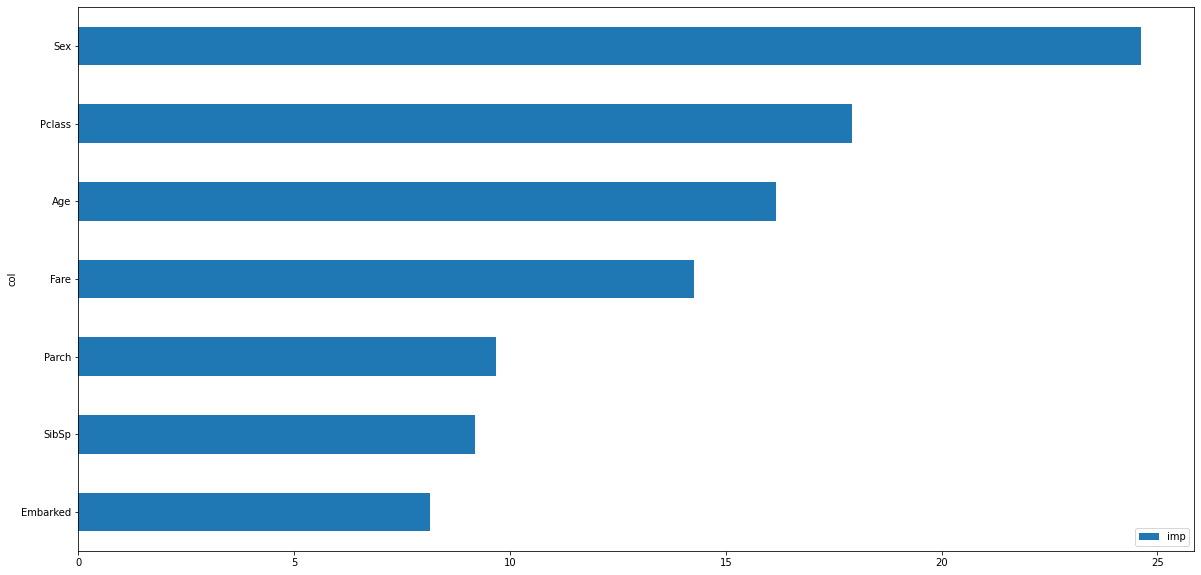

In [163]:

# Plot the feature importance scores
feature_importance(catboost_model, X_train)

imp       col
4  0.003009     Parch
6  0.013463  Embarked
3  0.056162     SibSp
0  0.127496    Pclass
5  0.145630      Fare
2  0.204926       Age
1  0.449314       Sex

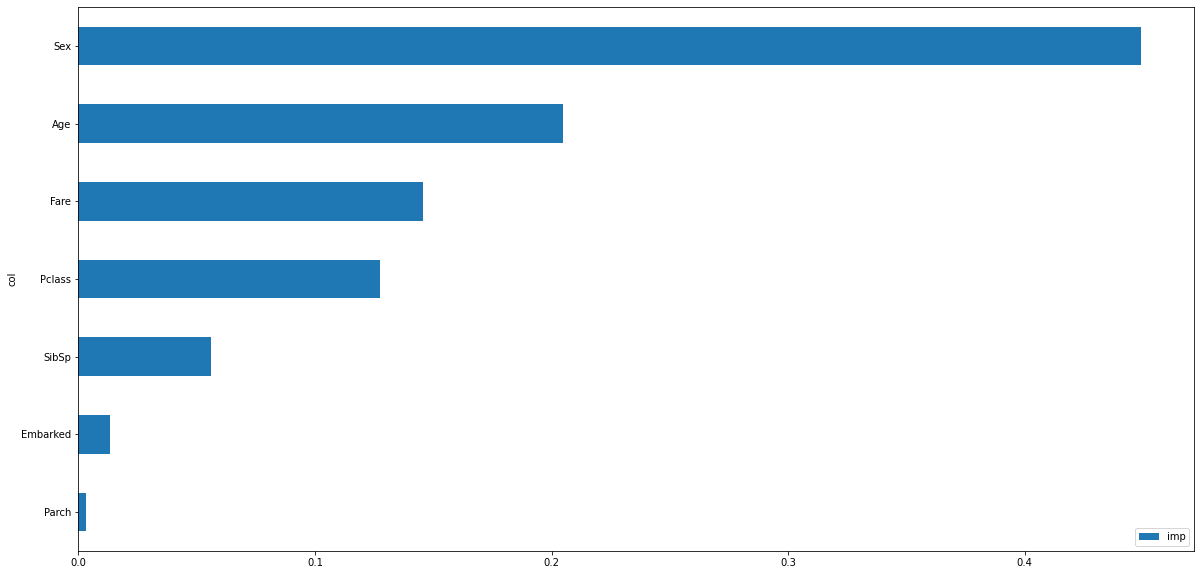

In [164]:
feature_importance(GradientBoostingClassifier().fit(X_train, y_train),X_train)

In [165]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.9160891476286749
Recall: 0.7502719298245613
F1: 0.8243336908627139
AUC: 0.9314901122721801


In [166]:

# One hot encode the columns in the test data frame (like X_train)
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')
test_age_one_hot =pd.get_dummies(test['Age'], 
                                   prefix='age')

In [167]:
# Combine the test one hot encoded columns with test
test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot,test_age_one_hot], axis=1)

In [168]:
test.head(50)

PassengerId  Pclass                                               Name  \
0           892       3                                   Kelly, Mr. James   
1           893       3                   Wilkes, Mrs. James (Ellen Needs)   
2           894       2                          Myles, Mr. Thomas Francis   
3           895       3                                   Wirz, Mr. Albert   
4           896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5           897       3                         Svensson, Mr. Johan Cervin   
6           898       3                               Connolly, Miss. Kate   
7           899       2                       Caldwell, Mr. Albert Francis   
8           900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9           901       3                            Davies, Mr. John Samuel   
10          902       3                                   Ilieff, Mr. Ylio   
11          903       1                         Jones, Mr. Charles Cresson   
12          904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
13          905       2                               Howard, Mr. Benjamin   
14          906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
15          907       2      del Carlo, Mrs. Sebastiano (Argenia Genovesi)   
16          908       2                                  Keane, Mr. Daniel   
17          909       3                                  Assaf, Mr. Gerios   
18          910       3                       Ilmakangas, Miss. Ida Livija   
19          911       3              Assaf Khalil, Mrs. Mariana (Miriam")"   
20          912       1                             Rothschild, Mr. Martin   
21          913       3                          Olsen, Master. Artur Karl   
22          914       1               Flegenheim, Mrs. Alfred (Antoinette)   
23          915       1                    Williams, Mr. Richard Norris II   
24          916       1    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
25          917       3                            Robins, Mr. Alexander A   
26          918       1                       Ostby, Miss. Helene Ragnhild   
27          919       3                                  Daher, Mr. Shedid   
28          920       1                            Brady, Mr. John Bertram   
29          921       3                                  Samaan, Mr. Elias   
30          922       2                       Louch, Mr. Charles Alexander   
31          923       2                      Jefferys, Mr. Clifford Thomas   
32          924       3           Dean, Mrs. Bertram (Eva Georgetta Light)   
33          925       3  Johnston, Mrs. Andrew G (Elizabeth Lily" Watson)"   
34          926       1                           Mock, Mr. Philipp Edmund   
35          927       3   Katavelas, Mr. Vassilios (Catavelas Vassilios")"   
36          928       3                                Roth, Miss. Sarah A   
37          929       3                                 Cacic, Miss. Manda   
38          930       3                                    Sap, Mr. Julius   
39          931       3                                      Hee, Mr. Ling   
40          932       3                                   Karun, Mr. Franz   
41          933       1                        Franklin, Mr. Thomas Parham   
42          934       3                              Goldsmith, Mr. Nathan   
43          935       2              Corbett, Mrs. Walter H (Irene Colvin)   
44          936       1   Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)   
45          937       3                    Peltomaki, Mr. Nikolai Johannes   
46          938       1                           Chevre, Mr. Paul Romaine   
47          939       3                           Shaughnessy, Mr. Patrick   
48          940       1    Bucknell, Mrs. William Robert (Emma Eliza Ward)   
49          941       3     Coutts, Mrs. William (Winnie Minnie" Treanor)"   

       Sex   Age  SibSp  

In [169]:
train.head(50)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   
20           21         0       2   
21           22         1       2   
22           23         1       3   
23           24         1       1   
24           25         0       3   
25           26         1       3   
26           27         0       3   
27           28         0       1   
28           29         1       3   
29           30         0       3   
30           31         0       1   
31           32         1       1   
32           33         1       3   
33           34         0       2   
34           35         0       1   
35           36         0       1   
36           37         1       3   
37           38         0       3   
38           39         0       3   
39           40         1       3   
40           41         0       3   
41           42         0       2   
42           43         0       3   
43           44         1       2   
44           45         1       3   
45           46         0       3   
46           47         0       3   
47           48         1       3   
48           49         0       3   
49           50         0       3   

                                                 Name     Sex        Age  \
0                             Braund, Mr. Owen Harris    male  22.000000   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                              Heikkinen, Miss. Laina  female  26.000000   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                            Allen, Mr. William Henry    male  35.000000   
5                                    Moran, Mr. James    male  28.950624   
6                             McCarthy, Mr. Timothy J    male  54.000000   
7                      Palsson, Master. Gosta Leonard    male   2.000000   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.000000   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.000000   
10                    Sandstrom, Miss. Marguerite Rut  female   4.000000   
11                           Bonnell, Miss. Elizabeth  female  58.000000   
12                     Saundercock, Mr. William Henry    male  20.000000   
13                        Andersson, Mr. Anders Johan    male  39.000000   
14               Vestrom, Miss. Hulda Amanda Adolfina  female  14.000000   
15                   Hewlett, Mrs. (Mary D Kingcome)   female  55.000000   
16                               Rice, Master. Eugene    male   2.000000   
17                       Williams, Mr. Charles Eugene    male  30.131408   
18  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.000000   
19                            Masselmani, Mrs. Fatima  female  22.189176   
20                               Fynney, Mr. Joseph J    male  35.000000   
21                              Beesley, Mr. Lawrence    male  34.000000   
22                        McGowan, Miss. Anna "Annie"  female  15.000000   
23                       Sloper, Mr. William Thompson    male  28.000000   
24                      Palsson, Miss. Torborg Danira  female   8.000000   
25  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.000000   
26                            Emir, Mr. Farred Chehab    male  2

In [170]:
# Create a list of columns to be used for the predictions
wanted_test_columns = X_train.columns

In [171]:
test["Age"] = test["Age"].apply(lambda x: 24 if math.isnan(x) else int(x))
test["Fare"] = test["Fare"].apply(lambda x: 24 if math.isnan(x) else int(x))
test.head(25)

PassengerId  Pclass                                               Name  \
0           892       3                                   Kelly, Mr. James   
1           893       3                   Wilkes, Mrs. James (Ellen Needs)   
2           894       2                          Myles, Mr. Thomas Francis   
3           895       3                                   Wirz, Mr. Albert   
4           896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5           897       3                         Svensson, Mr. Johan Cervin   
6           898       3                               Connolly, Miss. Kate   
7           899       2                       Caldwell, Mr. Albert Francis   
8           900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9           901       3                            Davies, Mr. John Samuel   
10          902       3                                   Ilieff, Mr. Ylio   
11          903       1                         Jones, Mr. Charles Cresson   
12          904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
13          905       2                               Howard, Mr. Benjamin   
14          906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
15          907       2      del Carlo, Mrs. Sebastiano (Argenia Genovesi)   
16          908       2                                  Keane, Mr. Daniel   
17          909       3                                  Assaf, Mr. Gerios   
18          910       3                       Ilmakangas, Miss. Ida Livija   
19          911       3              Assaf Khalil, Mrs. Mariana (Miriam")"   
20          912       1                             Rothschild, Mr. Martin   
21          913       3                          Olsen, Master. Artur Karl   
22          914       1               Flegenheim, Mrs. Alfred (Antoinette)   
23          915       1                    Williams, Mr. Richard Norris II   
24          916       1    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   

       Sex  Age  SibSp  Parch            Ticket  Fare            Cabin  \
0     male   34      0      0            330911     7              NaN   
1   female   47      1      0            363272     7              NaN   
2     male   62      0      0            240276     9              NaN   
3     male   27      0      0            315154     8              NaN   
4   female   22      1      1           3101298    12              NaN   
5     male   14      0      0              7538     9              NaN   
6   female   30      0      0            330972     7              NaN   
7     male   26      1      1            248738    29              NaN   
8   female   18      0      0              2657     7              NaN   
9     male   21      2      0         A/4 48871    24              NaN   
10    male   24      0      0            349220     7              NaN   
11    male   46      0      0               694    26              NaN   
12  female   23      1      0             21228    82              B45   
13    male   63      1      0             24065    26              NaN   
14  female   47      1      0       W.E.P. 5734    61              E31   
15  female   24      1      0     SC/PARIS 2167    27              NaN   
16    male   35      0      0            233734    12              NaN   
17    male   21      0      0              2692     7              NaN   
18  female   27      1      0  STON/O2. 3101270     7              NaN   
19  female   45      0      0              2696     7              NaN   
20    male   55      1      0          PC 17603    59              NaN   
21    male    9      0      1           C 17368     3              NaN   
22  female   24      0      0          PC 17598    31              NaN   
23    male   21      0      1          PC 17597    61              NaN   
24  female   48      1      3          PC 17608   262  B57 B59 B63 B66   

   Embarked  train_test  Survived  embarked_C  emb

In [172]:

# Make a prediction using the CatBoost model on the wanted columns
predictions = catboost_model.predict(test[wanted_test_columns])

In [173]:
predictions[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [174]:

# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0

In [175]:
gender_submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [176]:
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [177]:
submission.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0

In [178]:
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [179]:

# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('../catboost_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [180]:

# Check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("../catboost_submission.csv")
submissions_check.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0

In [181]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [182]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [183]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scaled,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 169 out of 200 | elapsed:    4.3s remaining:    0.7s


Logistic Regression
Best Score: 0.832772581758835
Best Parameters: {'C': 0.615848211066026, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.5s finished


In [184]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_scaled,y_train)
clf_performance(best_clf_knn,'KNN')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.8350386039796623
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.3s finished


In [ ]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scaled,y_train)
clf_performance(best_clf_svc,'SVC')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 55 candidates, totalling 275 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 244 out of 275 | elapsed:    4.4s remaining:    0.5s


In [ ]:
#Because the total feature space is so large, I used a randomized search to narrow down the paramters for the model. I took the best model from this and did a more granular search 
"""
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [100,500,1000], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf_rnd = clf_rf_rnd.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf_rnd,'Random Forest')"""

In [ ]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf,'Random Forest')

In [ ]:
best_rf = best_clf_rf.best_estimator_.fit(X_train_scaled,y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)
clf_performance(best_clf_xgb,'XGB')

In [ ]:
y_hat_xgb = best_clf_xgb.best_estimator_.predict(X_test_scaled).astype(int)
xgb_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_xgb}
submission_xgb = pd.DataFrame(data=xgb_submission)
submission_xgb.to_csv('xgb_submission3.csv', index=False)

In [ ]:
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

voting_clf_hard = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'hard') 
voting_clf_soft = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'soft') 
voting_clf_all = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('lr', best_lr)], voting = 'soft') 
voting_clf_xgb = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('xgb', best_xgb),('lr', best_lr)], voting = 'soft')

print('voting_clf_hard :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5))
print('voting_clf_hard mean :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5).mean())

print('voting_clf_soft :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5))
print('voting_clf_soft mean :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5).mean())

print('voting_clf_all :',cross_val_score(voting_clf_all,X_train,y_train,cv=5))
print('voting_clf_all mean :',cross_val_score(voting_clf_all,X_train,y_train,cv=5).mean())

print('voting_clf_xgb :',cross_val_score(voting_clf_xgb,X_train,y_train,cv=5))
print('voting_clf_xgb mean :',cross_val_score(voting_clf_xgb,X_train,y_train,cv=5).mean())

In [ ]:
#in a soft voting classifier you can weight some models more than others. I used a grid search to explore different weightings
#no new results here
params = {'weights' : [[1,1,1],[1,2,1],[1,1,2],[2,1,1],[2,2,1],[1,2,2],[2,1,2]]}

vote_weight = GridSearchCV(voting_clf_soft, param_grid = params, cv = 5, verbose = True, n_jobs = -1)
best_clf_weight = vote_weight.fit(X_train_scaled,y_train)
clf_performance(best_clf_weight,'VC Weights')
voting_clf_sub = best_clf_weight.best_estimator_.predict(X_test_scaled)

In [ ]:
voting_clf_hard.fit(X_train_scaled, y_train)
voting_clf_soft.fit(X_train_scaled, y_train)
voting_clf_all.fit(X_train_scaled, y_train)
voting_clf_xgb.fit(X_train_scaled, y_train)

best_rf.fit(X_train_scaled, y_train)
y_hat_vc_hard = voting_clf_hard.predict(X_test_scaled).astype(int)
y_hat_rf = best_rf.predict(X_test_scaled).astype(int)
y_hat_vc_soft =  voting_clf_soft.predict(X_test_scaled).astype(int)
y_hat_vc_all = voting_clf_all.predict(X_test_scaled).astype(int)
y_hat_vc_xgb = voting_clf_xgb.predict(X_test_scaled).astype(int)

In [ ]:
#convert output to dataframe 
final_data = {'PassengerId': test.PassengerId, 'Survived': y_hat_rf}
submission = pd.DataFrame(data=final_data)

final_data_2 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_hard}
submission_2 = pd.DataFrame(data=final_data_2)

final_data_3 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_soft}
submission_3 = pd.DataFrame(data=final_data_3)

final_data_4 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_all}
submission_4 = pd.DataFrame(data=final_data_4)

final_data_5 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_xgb}
submission_5 = pd.DataFrame(data=final_data_5)

final_data_comp = {'PassengerId': test.PassengerId, 'Survived_vc_hard': y_hat_vc_hard, 'Survived_rf': y_hat_rf, 'Survived_vc_soft' : y_hat_vc_soft, 'Survived_vc_all' : y_hat_vc_all,  'Survived_vc_xgb' : y_hat_vc_xgb}
comparison = pd.DataFrame(data=final_data_comp)

In [ ]:
#track differences between outputs 
comparison['difference_rf_vc_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_rf else 0, axis =1)
comparison['difference_soft_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_vc_soft else 0, axis =1)
comparison['difference_hard_all'] = comparison.apply(lambda x: 1 if x.Survived_vc_all != x.Survived_vc_hard else 0, axis =1)

In [ ]:
#prepare submission files 
submission.to_csv('submission_rf.csv', index =False)
submission_2.to_csv('submission_vc_hard.csv',index=False)
submission_3.to_csv('submission_vc_soft.csv', index=False)
submission_4.to_csv('submission_vc_all.csv', index=False)
submission_5.to_csv('submission_vc_xgb2.csv', index=False)